In [0]:
import os
import pandas as pd
import numpy as np
import timeit
import ujson
#Usamos ujson que parece que es el que hace la importación más rápida. Añadir la documentación donde se comenta.
#from google.colab import drive  #Lo pongo más abajo, porque si no me da error (por qué??!!)

#Para conocer el uso de la memoria
import os 
import psutil

In [19]:
!ls -lh

total 3.2G
-rw-r--r-- 1 root root 2.5K Oct 31 08:13 adc.json
-rw-r--r-- 1 root root 2.7M Oct 31 08:14 Cast_Crew_ids.csv
drwx------ 3 root root 4.0K Oct 31 08:25 drive
-rw-r--r-- 1 root root 1.5M Oct 31 08:14 IMDB_5000_movie.csv
-rw-r--r-- 1 root root 117K Oct 31 08:14 Movies_ids.csv
-rw-r--r-- 1 root root 1.5G Oct 31 08:13 movies.zip
-rw-r--r-- 1 root root 1.8G Oct 31 08:14 people.zip
drwxr-xr-x 2 root root 4.0K Oct 29 16:42 sample_data
drwxr-xr-x 4 root root 4.0K Oct 31 08:17 themoviedb_data


##IMPORTACIÓN DESDE GOOGLE DRIVE

In [0]:
#Esto sólo funciona en Google Colab porque tiene una librería de Google Colab.
#Más documentación en:
#https://colab.research.google.com/notebooks/io.ipynb
#en el apartado PyDrive.
#PyDrive documentación:
#https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

In [0]:
#Estos ficheros están en mi google drive.

#movies data
file_id = '1-jrX_p1VfgMceGIj7SK_eIef8syIGsdL'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("movies.zip")

#movies ids
file_id = '1-1M-smshevfKWEj5DPpxHJ6QzP82m2c7'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("Movies_ids.csv")

#people data
file_id = '1UnpPTqVcghfQzj55RIoLm8pBH_Rjdl4f'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("people.zip")

#people ids
file_id = '19oOa9qjMFnDv19DHmNTTJKIuGW8X5BkQ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("Cast_Crew_ids.csv")

#IMDB 5000 movies:
file_id = '1ebj6EkGylXTGldfGfJO_AHEAncNf4zKA'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("IMDB_5000_movie.csv")

In [5]:
!ls -lh

total 3.2G
-rw-r--r-- 1 root root 2.5K Oct 31 08:13 adc.json
-rw-r--r-- 1 root root 2.7M Oct 31 08:14 Cast_Crew_ids.csv
-rw-r--r-- 1 root root 1.5M Oct 31 08:14 IMDB_5000_movie.csv
-rw-r--r-- 1 root root 117K Oct 31 08:14 Movies_ids.csv
-rw-r--r-- 1 root root 1.5G Oct 31 08:13 movies.zip
-rw-r--r-- 1 root root 1.8G Oct 31 08:14 people.zip
drwxr-xr-x 2 root root 4.0K Oct 29 16:42 sample_data


In [6]:
#Da un error pero no tiene consecuencias
!mkdir themoviedb_data
!cd themoviedb_data && unzip -q ../movies.zip
!cd themoviedb_data && unzip -q ../people.zip
!ls -lh themoviedb_data

warning [../movies.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [../movies.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #409792).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
warning [../people.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [../people.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #1197557).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
total 45M
drwxr-xr-x 2 root root 12M Oct 

In [7]:
!ls -1 themoviedb_data/movies | wc -l

409791


In [8]:
!ls -1 themoviedb_data/people | wc -l

1197556


In [9]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

151773184


In [10]:
%whos

Variable            Type               Data/Info
------------------------------------------------
GoogleAuth          type               <class 'pydrive.auth.GoogleAuth'>
GoogleCredentials   type               <class 'oauth2client.client.GoogleCredentials'>
GoogleDrive         type               <class 'pydrive.drive.GoogleDrive'>
auth                module             <module 'google.colab.aut<...>es/google/colab/auth.py'>
downloaded          GoogleDriveFile    GoogleDriveFile({'id': '1<...>Q', 'spaces': ['drive']})
drive               GoogleDrive        <pydrive.drive.GoogleDriv<...>object at 0x7f70d5becfd0>
file_id             str                1ebj6EkGylXTGldfGfJO_AHEAncNf4zKA
gauth               GoogleAuth         <pydrive.auth.GoogleAuth <...>object at 0x7f70c7e3cd30>
np                  module             <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
os                  module             <module 'os' from '/usr/lib/python3.6/os.py'>
pd                  module        

##ACCESO A MI DRIVE

In [11]:
#Esto me va a permitir tener acceso a las carpetas de mi drive desde Colab:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
!ls "/content/drive/My Drive/" -lh

total 3.2G
drwx------ 2 root root 4.0K Jul 14 07:08  20180714_Deep_Learning
-rw------- 1 root root  76K Oct 22 18:13  6885.json
drwx------ 2 root root 4.0K Jun 26  2016 'avast! Files (XT1068, UWbYzWPVmAmwlrlD)'
-rw------- 1 root root 2.7M Oct 28 21:03  Cast_Crew_ids.csv
drwx------ 2 root root 4.0K Jul 18 18:38 'Colab Notebooks'
-rw------- 1 root root  44K Feb  4  2018  contacts.vcf
-rw------- 1 root root    1 Apr  9  2018  facturaIVA.gsheet
-rw------- 1 root root 1.5M Oct 24 17:34  IMDB_5000_movie.csv
-rw------- 1 root root    1 Oct 30 16:14 'Mis cuentas.gsheet'
-rw------- 1 root root 117K Oct 28 21:04  Movies_ids.csv
-rw------- 1 root root 1.5G Oct 12 15:09  movies.zip
-rw------- 1 root root    1 Oct 20 08:40 'Nuestras Cuentas.gsheet'
-rw------- 1 root root 1.8G Oct 27 13:06  people.zip
-rw------- 1 root root    1 Jul 24 18:17 'Propuesta de una idea.gslides'
drwx------ 2 root root 4.0K Apr  7  2015  Screencastify
-rw------- 1 root root    1 Sep 30  2017  Series.gdoc
-rw------- 1 root 

## IMPORTACIÓN DE LOS JSON'S DE PELÍCULAS A UN DATAFRAME

In [22]:
#Reading file and saving in df
dfMoviesIds = pd.read_csv('./Movies_ids.csv')
dfMoviesIds.tail()

,Unnamed: 0,movie_id
10851,10851,397837
10852,10852,77866
10853,10853,220669
10854,10854,140581
10855,10855,70868


In [0]:
setMoviesIds = set(dfMoviesIds['movie_id'])

In [24]:
#Lo importo todo. Tengo que reducir el número de campos para que me quepa en memoria.
#Excluyo: backdrop_path, external_ids, homepage, images_backdrops, images_posters, poster_path, similar_movies_page/results/total_pages/total_results,
#video, recommendations_page/results/total_pages/total_results
#Recommendations: películas recomendadas para una película. No es lo mismo que similar_movies.
#Para hacer esto debería hacer una importación inicial de todos los campos y luego, una vez decidido, importo todo.

#Usamos un generator, que es más eficiente en cuanto a memoria. "yield" va asociado al generator.
#Poner la nota: importo todo, aunque sé que lo voy a usar, por si alguien puede querer usarlo.
#Desanido el primer nivel de diccionarios. Para belongs_to_collection, que a veces es nulo en lugar de un diccionario, tomo dos keys.
#Me queda tratar las listas que contienen diccionarios. 
#¿Qué pasa con UTF8? !!!!!!!!!!!!!!!!!!!!!!!!!!
#No vale de nada cambiar el orden!!! Así que mantengo el alfabético del csv
#Por mi código anterior ya sé que adult es un booleano y que no tiene nulos. Así que puedo filtrarlo por adult = False. Voy a excluir estas
#pelis de mi análisis.

#Sobre mi notebook 03 he incluido la variable imdb_id, que necesito para el cruce posterior que hago.

path = "./themoviedb_data/movies"
dfMovies = pd.DataFrame()

def moviesIterator(path):
    intI = 0
    for root, dirs, files in os.walk(path):
        for f in files:
            intI += 1
            if f.endswith('.json'):
                fp = os.path.join(root,f)
                with open(fp) as o:
                    data = ujson.load(o)
                
                if intI % 10000 == 0:
                    print(intI)
                    
                result = {"titles": data["alternative_titles"]["titles"], 
                       "budget": data["budget"], "credits_cast": data["credits"]["cast"], "credits_crew": data["credits"]["crew"],
                       "genres": data["genres"], "movie_id": data["id"], "imdb_id": data["imdb_id"],
                       "keywords": data["keywords"]["keywords"], "original_language": data["original_language"],
                       "original_title": data["original_title"], "overview": data["overview"],
                       "popularity": data["popularity"], 
                       "production_companies": data["production_companies"], "production_countries": data["production_countries"],
                       "release_date": data["release_date"], "release_dates": data["release_dates"]["results"],
                       "revenue": data["revenue"], 
                       "reviews_page": data["reviews"]["page"],
                       "reviews_results": data["reviews"]["results"],
                       "reviews_total_pages": data["reviews"]["total_pages"],
                       "reviews_total_results": data["reviews"]["total_results"],
                       "runtime": data["runtime"],
                       "spoken_languages": data["spoken_languages"], "status": data["status"],
                       "tagline": data["tagline"], "title": data["title"], 
                       "vote_average": data["vote_average"], "vote_count": data["vote_count"]}
                    
                if data["belongs_to_collection"] is None:
                    result["belongs_to_collection_id"] = None
                    result["belongs_to_collection_name"] = None
                else:
                    result["belongs_to_collection_id"] = data["belongs_to_collection"]["id"]
                    result["belongs_to_collection_name"] = data["belongs_to_collection"]["name"]
                    
                if data["adult"] == False and data["id"] in setMoviesIds:
                    yield result
                      
tic=timeit.default_timer()
dfMovies = pd.DataFrame(moviesIterator(path))
#dfMovies.set_index('id', inplace=True)
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000


139.43972294100013

In [25]:
dfMovies.shape

(10856, 30)

In [26]:
dfMoviesIds.shape

(10856, 2)

In [27]:
dfMovies.columns

Index(['belongs_to_collection_id', 'belongs_to_collection_name', 'budget',
       'credits_cast', 'credits_crew', 'genres', 'imdb_id', 'keywords',
       'movie_id', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'release_dates', 'revenue', 'reviews_page',
       'reviews_results', 'reviews_total_pages', 'reviews_total_results',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'titles',
       'vote_average', 'vote_count'],
      dtype='object')

In [0]:
dfMovies.index = dfMovies['movie_id']

In [29]:
dfMovies['movie_id'].head()

movie_id
10147      10147
9516        9516
9932        9932
224141    224141
14411      14411
Name: movie_id, dtype: int64

In [30]:
#Compruebo que no se repite el identificador id de tmdb de las películas:
dfMovies['movie_id'].duplicated().sum()

0

In [0]:
#columnName: columna de dfMovies a tratar. Sus elemeentos son listas de diccionarios.
#args: lista variable de claves con las que me voy a quedar de los diccionarios.
#Si un elemento es una lista vacía, no hay problema.

#Esta función requiere que el index sea el id de la película. Podría cambiarse para que no fuese así, pero sería mucho más lenta.
def columnIteratorMovies(columnName, *args):
    for id in dfMovies.index:
        for dict in dfMovies[dfMovies.index == id][columnName].iloc[0]:
            outputDict = {'movie_id': id}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

In [0]:
#Creo mi dataframe con la info de la columna correspondiente, compruebo que tiene el nº filas que ha de tener y, si es así, elimino la columna
#correspondiente en dfMovies. Haré todo esto con la siguiente función:
def columnProcessesMovies (columnName, *args):
    #I need to declare dfMovies as global as I will change it inside this function.
    global dfMovies
    
    dfOutput = pd.DataFrame()
    dfOutput = pd.DataFrame(columnIteratorMovies(columnName, *args))
    
    #Compruebo que tiene el nº de registros que ha de tener.
    dfCheck = pd.DataFrame(dfMovies[columnName].map(len).value_counts())
    dfCheck['calculation']=dfCheck[columnName]*dfCheck.index
    
    if dfOutput.shape[0] == dfCheck['calculation'].sum():
        dfMovies = dfMovies.drop(columnName, axis=1)
        return dfOutput
    else:
        return "Error in process"

In [0]:
def columnIteratorReleaseDates(*args):
    dfMoviesReleaseDates1 = columnProcessesMovies ('release_dates', 'iso_3166_1', 'release_dates')
    
    for id in dfMoviesReleaseDates1.index:
        for dict in dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['release_dates'].iloc[0]:
            outputDict = {'movie_id': dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['movie_id'].iloc[0],
                         'iso_3166_1': dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['iso_3166_1'].iloc[0]}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

In [34]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

1022234624


##ENRIQUECIMIENTO DE LA INFORMACIÓN DE PELÍCULAS CON LA FUENTE IMDB:

In [35]:
my_file_path='./IMDB_5000_movie.csv'

#Reading file and saving in df
dfMovies5000 = pd.read_csv(my_file_path)
dfMovies5000.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [36]:
dfMovies5000.shape

(5043, 28)

In [37]:
dfMovies5000.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [0]:
#Construyo una nueva columna con el identificador de imdb: id_imdb
dfMovies5000['imdb_id'] = dfMovies5000['movie_imdb_link'].str.split("/").map(lambda list: list[4])

In [0]:
#O sea: los duplicados a nivel de clave lo son también a nivel de gross y budget salvo por un registro. Voy a eliminar los
#duplicados a nivel de clave quedándome con el primero de los registros que me encuentre (SIMPLIFICACIÓN).
dfMovies5000 = dfMovies5000.drop_duplicates(subset='imdb_id', keep='first')

In [0]:
#Debería sustituir las cadenas de longitud vacía por nulos, para tener un criterio homogéneo. Lo hago:
#Podría mejorarlo (si necesito aplicarlo a otros) y convertir cualquier cadena de longitud vacía en nulos.
#Esta función se aplica a cualquier tipo de dato y devuelvo un None si la entrada es ''
def fill_blank_with_nones(value):
    if value=='':
        return None
    else:
        return value

In [0]:
dfMovies['imdb_id']=dfMovies['imdb_id'].map(fill_blank_with_nones)

In [42]:
#Veo si lo he hecho bien: ¿cuántos nulos tengo ahora?
dfMovies['imdb_id'].isnull().sum()

453

In [43]:
dfMovies["imdb_id"].value_counts().head(5)

tt0892782    1
tt0300471    1
tt0098385    1
tt0211792    1
tt7224328    1
Name: imdb_id, dtype: int64

In [0]:
#Quiero cambiar el nombre de algunas columnas antes de cruzar, para que sean más fácilmente identificables:
def change_column_names(str):
    if str == 'budget':
        return 'imdb_budget'
    elif str == 'gross':
        return 'imdb_revenue'
    else:
        return str

In [0]:
dfMovies5000.columns = list(map(change_column_names, dfMovies5000.columns.tolist()))

In [46]:
dfMovies5000.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'imdb_revenue', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'imdb_budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'imdb_id'],
      dtype='object')

In [0]:
#Hago el cruce:
dfMovies = dfMovies.merge(dfMovies5000[['imdb_id', 'imdb_revenue', 'imdb_budget', 'director_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']], how='left', left_on='imdb_id', right_on='imdb_id')

In [48]:
dfMovies.shape

(10856, 35)

In [0]:
#Pero ahora tengo distinto criterio en budget y revenue para tmdb e imdb:
#Igualo criterios:
def change_none_to_zero(num):
    if num != num or num is None:
        return 0
    else:
        return num

In [0]:
dfMovies['imdb_budget'] = dfMovies['imdb_budget'].map(change_none_to_zero)
dfMovies['imdb_revenue'] = dfMovies['imdb_revenue'].map(change_none_to_zero)

In [51]:
#Chequeo:
dfMovies[['budget', 'revenue', 'imdb_budget', 'imdb_revenue']].notnull().sum()

budget          10856
revenue         10856
imdb_budget     10856
imdb_revenue    10856
dtype: int64

In [52]:
#¿Cuántos 0s tengo?
dfMovies[['budget', 'revenue', 'imdb_budget', 'imdb_revenue']].applymap(lambda num: num==0).sum()

budget          3687
revenue          842
imdb_budget     6859
imdb_revenue    6805
dtype: int64

In [0]:
#Voy a adoptar un criterio simple ahora: tomo el dato de tmdb de revenue o budget, a no ser que sea 0 o <50, en cuyo caso tomo el de imdb.
#Afinarlo más adelante!!!!
dfMovies['revenue_final'] = dfMovies['revenue'] * ((dfMovies['revenue']>50) | ((dfMovies['revenue']<=50) & (dfMovies['imdb_revenue']==0))) + dfMovies['imdb_revenue'] * (~((dfMovies['revenue']>50) | ((dfMovies['revenue']<=50) & (dfMovies['imdb_revenue']==0))))
dfMovies['budget_final'] = dfMovies['budget'] * ((dfMovies['budget']>50) | ((dfMovies['budget']<=50) & (dfMovies['imdb_budget']==0))) + dfMovies['imdb_budget'] * (~((dfMovies['budget']>50) | ((dfMovies['budget']<=50) & (dfMovies['imdb_budget']==0))))

In [54]:
#¿Cuántos 0s tengo?
dfMovies[['budget', 'revenue', 'imdb_budget', 'imdb_revenue', 'budget_final', 'revenue_final']].applymap(lambda num: num==0).sum()

budget           3687
revenue           842
imdb_budget      6859
imdb_revenue     6805
budget_final     3212
revenue_final       0
dtype: int64

In [55]:
#En algún paso me he cargado los índices:
dfMovies['movie_id'].head()

0     10147
1      9516
2      9932
3    224141
4     14411
Name: movie_id, dtype: int64

In [0]:
#Vuelvo a machacarlos con el movie_id:
dfMovies.index = dfMovies['movie_id']

In [57]:
dfMovies['movie_id'].head()

movie_id
10147      10147
9516        9516
9932        9932
224141    224141
14411      14411
Name: movie_id, dtype: int64

In [58]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

1026052096


##IMPORTACIÓN DE LOS JSON'S DE CAST/CREW A UN DATAFRAME

##### IMPORTO LAS PERSONAS A UN DATAFRAME, YA EXCLUYENDO ALGUNOS CAMPOS Y SÓLO TOMANDO LOS ID'S QUE HAN TRABAJADO EN PELIS CON REVENUE_FINAL>0

In [59]:
#Reading file and saving in df
dfPeopleIds = pd.read_csv('./Cast_Crew_ids.csv')
dfPeopleIds.tail()

,Unnamed: 0,id
203176,203176,1112938
203177,203177,1112939
203178,203178,1112940
203179,203179,34438
203180,203180,567605


In [0]:
setPeopleIds = set(dfPeopleIds['id'])

In [61]:
#Usamos un generator, que es más eficiente en cuanto a memoria. "yield" va asociado al generator.
#Excluyo: also_known_as, biography, external_ids_imdb_id, homepage, images_profiles, profile_path
#Además, sólo tomo los ids que están en el set setPeopleIds

#This takes about 20min to be executed in Google Colab

path = "./themoviedb_data/people"
dfPeople = pd.DataFrame()

def peopleIterator(path):
    intI = 0
    for root, dirs, files in os.walk(path):
        for f in files:
            intI += 1
            if f.endswith('.json'):
                fp = os.path.join(root,f)
                with open(fp) as o:
                    data = ujson.load(o)
                
                if intI % 10000 == 0:
                    print(intI)
                    
                result = {"adult": data["adult"], 
                          "birthday": data["birthday"], "deathday": data["deathday"], 
                          "gender": data["gender"], "people_id": data["id"], "imdb_id": data.get("imdb_id",None),
                          "known_for_department": data["known_for_department"], "name": data["name"], "place_of_birth": data["place_of_birth"],
                          "popularity": data["popularity"], "tv_credits_cast": data["tv_credits"]["cast"], 
                          "tv_credits_crew": data["tv_credits"]["crew"]}

                #After the dfTypeCheck, we know that movie_credits is not a dictionary in two rows (probably this is an error.). 
                #So we need to take this situation into consideration:
                if isinstance(data["movie_credits"], dict):
                    result["movie_credits_cast"] = data["movie_credits"]["cast"]
                    result["movie_credits_crew"] = data["movie_credits"]["crew"]
                else:
                    #Aquí es importante poner una lista de longitud vacía, que nos va a evitar problemas.
                    result["movie_credits_cast"] = list()
                    result["movie_credits_crew"] = list()

                if data["id"] in setPeopleIds:    
                    yield result  
                  
tic=timeit.default_timer()
dfPeople = pd.DataFrame(peopleIterator(path))
#dfPeople.set_index('id', inplace=True)
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000


1310.227490355

In [62]:
dfPeopleIds.shape

(203181, 2)

In [63]:
#Tengo 23 ids que aparecen en mis películas pero no en mi base de datos de People. Bueno, asumo el ínfimo error.
dfPeople.shape

(203159, 14)

In [64]:
dfPeople.columns

Index(['adult', 'birthday', 'deathday', 'gender', 'imdb_id',
       'known_for_department', 'movie_credits_cast', 'movie_credits_crew',
       'name', 'people_id', 'place_of_birth', 'popularity', 'tv_credits_cast',
       'tv_credits_crew'],
      dtype='object')

In [65]:
#Compruebo que no se repite el identificador id de tmdb de las personas:
dfPeople['people_id'].duplicated().sum()

0

In [0]:
dfPeople.index  = dfPeople['people_id']

In [67]:
dfPeople['people_id'].head()

people_id
1695992    1695992
1571258    1571258
118483      118483
552174      552174
66546        66546
Name: people_id, dtype: int64

In [0]:
#columnName: columna de dfMovies a tratar. Sus elemeentos son listas de diccionarios.
#args: lista variable de claves con las que me voy a quedar de los diccionarios.
#Si un elemento es una lista vacía, no hay problema.
def columnIteratorPeople(columnName, *args):
    for id in dfPeople.index:
        for dict in dfPeople[dfPeople.index == id][columnName].iloc[0]:
            outputDict = {'people_id': id}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

In [0]:
#Creo mi dataframe con la info de la columna correspondiente, compruebo que tiene el nº filas que ha de tener y, si es así, elimino la columna
#correspondiente en dfMovies. Haré todo esto con la siguiente función:
def columnProcessesPeople (columnName, *args):
    #I need to declare dfMovies as global as I will change it inside this function.
    global dfPeople
    
    dfOutput = pd.DataFrame()
    dfOutput = pd.DataFrame(columnIteratorPeople(columnName, *args))
    
    #Compruebo que tiene el nº de registros que ha de tener.
    dfCheck = pd.DataFrame(dfPeople[columnName].map(len).value_counts())
    dfCheck['calculation']=dfCheck[columnName]*dfCheck.index
    
    if dfOutput.shape[0] == dfCheck['calculation'].sum():
        dfPeople = dfPeople.drop(columnName, axis=1)
        return dfOutput
    else:
        return "Error in process"

In [70]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

7072489472


##CREO LAS TABLAS AUXILIARES DE MOVIES Y PEOPLE

In [71]:
dfMovies['movie_id'].head()

movie_id
10147      10147
9516        9516
9932        9932
224141    224141
14411      14411
Name: movie_id, dtype: int64

In [72]:
dfPeople['people_id'].head()

people_id
1695992    1695992
1571258    1571258
118483      118483
552174      552174
66546        66546
Name: people_id, dtype: int64

In [73]:
#Generación de todas las tablas de una tacada: 
#This module took less than 4min to be executed in Google Colab.
tic=timeit.default_timer()

dfMoviesCast = columnProcessesMovies ('credits_cast', 'cast_id', 'character', 'gender', 'id', 'name', 'order')
print("dfMoviesCast generated")
dfMoviesCrew = columnProcessesMovies ('credits_crew', 'department', 'gender', 'id', 'job', 'name')
print("dfMoviesCrew generated")
dfMoviesGenres = columnProcessesMovies ('genres', 'id', 'name')
print("dfMoviesGenres generated")
dfMoviesKeywords = columnProcessesMovies ('keywords', 'id', 'name')
print("dfMoviesKeywords generated")
dfMoviesProductionComp = columnProcessesMovies ('production_companies', 'id', 'name', 'origin_country')
print("dfMoviesProductionComp generated")
dfMoviesProductionCountries = columnProcessesMovies ('production_countries', 'iso_3166_1', 'name')
print("dfMoviesProductionCountries generated")
dfMoviesReviewsResults = columnProcessesMovies ('reviews_results', 'author', 'content', 'id')
print("dfMoviesReviewsResults generated")
dfMoviesSpokenLang = columnProcessesMovies ('spoken_languages', 'iso_639_1', 'name')
print("dfMoviesSpokenLang generated")
dfMoviesReleaseDates = pd.DataFrame(columnIteratorReleaseDates('certification', 'iso_639_1', 'release_date', 'type'))
print("dfMoviesReleaseDates generated")

#Libero la memoria (realmento no lo hace...)
#dfMoviesReleaseDates1 = pd.DataFrame()
#%xdel dfMoviesReleaseDates1

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

dfMoviesCast generated
dfMoviesCrew generated
dfMoviesGenres generated
dfMoviesKeywords generated
dfMoviesProductionComp generated
dfMoviesProductionCountries generated
dfMoviesReviewsResults generated
dfMoviesSpokenLang generated
dfMoviesReleaseDates generated


226.20304889399995

In [74]:
dfMovies.shape

(10856, 28)

In [75]:
dfMovies.columns

Index(['belongs_to_collection_id', 'belongs_to_collection_name', 'budget',
       'imdb_id', 'movie_id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'reviews_page',
       'reviews_total_pages', 'reviews_total_results', 'runtime', 'status',
       'tagline', 'title', 'titles', 'vote_average', 'vote_count',
       'imdb_revenue', 'imdb_budget', 'director_facebook_likes',
       'cast_total_facebook_likes', 'movie_facebook_likes', 'revenue_final',
       'budget_final'],
      dtype='object')

In [76]:
#Para saber el uso de memoria que estoy haciendo:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

7112499200


In [77]:
#Generación de todas las tablas de una tacada: 
#This module took about 10min to be executed in Google Colab.
tic=timeit.default_timer()

dfPeopleMoviesCast = columnProcessesPeople ('movie_credits_cast', 'adult', 'character', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count')
print("dfPeopleMoviesCast generated")
dfPeopleMoviesCrew = columnProcessesPeople ('movie_credits_crew', 'adult', 'department', 'genre_ids', 'id', 'job', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count')
print("dfPeopleMoviesCrew generated")
dfPeopleTvCast = columnProcessesPeople ('tv_credits_cast', 'character', 'episode_count', 'first_air_date', 'genre_ids', 'id', 'name', 'origin_country', 'original_language', 'original_name', 'popularity', 'vote_average', 'vote_count')
print("dfPeopleTvCast generated")
dfPeopleTvCrew = columnProcessesPeople ('tv_credits_crew', 'department', 'episode_count', 'first_air_date', 'genre_ids', 'id', 'job', 'name', 'origin_country', 'original_language', 'original_name', 'popularity', 'vote_average', 'vote_count')
print("dfPeopleTvCrew generated")

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

dfPeopleMoviesCast generated
dfPeopleMoviesCrew generated
dfPeopleTvCast generated
dfPeopleTvCrew generated


684.3721568740002

In [78]:
dfPeople.columns

Index(['adult', 'birthday', 'deathday', 'gender', 'imdb_id',
       'known_for_department', 'name', 'people_id', 'place_of_birth',
       'popularity'],
      dtype='object')

In [79]:
dfPeople.shape

(203159, 10)

####CONTROL DE LA MEMORIA:

In [80]:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

7807963136


In [81]:
#Y así veo cuánta memoria ocupa este dataframe:
dfPeople.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203159 entries, 1695992 to 1104037
Data columns (total 10 columns):
adult                   203159 non-null bool
birthday                43801 non-null object
deathday                10266 non-null object
gender                  203159 non-null int64
imdb_id                 203159 non-null object
known_for_department    203159 non-null object
name                    203159 non-null object
people_id               203159 non-null int64
place_of_birth          36097 non-null object
popularity              203159 non-null float64
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 63.3 MB


In [82]:
%whos

Variable                      Type               Data/Info
----------------------------------------------------------
GoogleAuth                    type               <class 'pydrive.auth.GoogleAuth'>
GoogleCredentials             type               <class 'oauth2client.client.GoogleCredentials'>
GoogleDrive                   type               <class 'pydrive.drive.GoogleDrive'>
auth                          module             <module 'google.colab.aut<...>es/google/colab/auth.py'>
change_column_names           function           <function change_column_names at 0x7f70c527ebf8>
change_none_to_zero           function           <function change_none_to_zero at 0x7f70c527e620>
columnIteratorMovies          function           <function columnIteratorMovies at 0x7f70b805f158>
columnIteratorPeople          function           <function columnIteratorPeople at 0x7f6f90499ae8>
columnIteratorReleaseDates    function           <function columnIteratorR<...>eDates at 0x7f7096a7fae8>
columnProcess

##STRUCTURE QUALITY CHECK:

####dfMoviesCast
#####PRIMARY KEYS: movie_id / id

In [83]:
dfMoviesCast.shape

(215702, 7)

In [84]:
dfMoviesCast[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [85]:
#Percentage of "completitud":
dfMoviesCast[['movie_id', 'id']].count()/dfMoviesCast.shape[0]

movie_id    1.0
id          1.0
dtype: float64

In [86]:
#Un actor podría hacer más de un personaje en una peli. Por eso aquí puedo tener duplicados. Pero veo que algunos son errores.
dfMoviesCast[['movie_id', 'id']].duplicated().sum()

421

In [87]:
#Pero no aquí:
dfMoviesCast[['movie_id', 'id', 'cast_id']].duplicated().sum()

0

In [88]:
#Echo un vistazo a esos duplicados:
dfMoviesCast[['movie_id', 'id']][dfMoviesCast[['movie_id', 'id']].duplicated()].head()

,movie_id,id
289,1955,11282
943,37821,118592
1380,11007,18976
2624,218784,929511
2709,1934,4757


In [89]:
#En este caso, es un error
dfMoviesCast[(dfMoviesCast['movie_id'] == 76341) & (dfMoviesCast['id'] == 1734187)]

,cast_id,character,gender,id,movie_id,name,order
70179,132,War Pups,0,1734187,76341,Riley Paton,43
70181,134,War Pup,0,1734187,76341,Riley Paton,45


In [90]:
#También es un error
dfMoviesCast[(dfMoviesCast['movie_id'] == 319091) & (dfMoviesCast['id'] == 1901398)]

,cast_id,character,gender,id,movie_id,name,order
46991,3,Herself,0,1901398,319091,Claire Potter,3
46993,5,"Herself, professor of history",0,1901398,319091,Claire Potter,5


In [91]:
#Aquí no está claro
dfMoviesCast[(dfMoviesCast['movie_id'] == 89909) & (dfMoviesCast['id'] == 157618)]

,cast_id,character,gender,id,movie_id,name,order
37424,33,Trustee,2,157618,89909,Don Pugsley,31
37425,34,Christian #2,2,157618,89909,Don Pugsley,32


In [0]:
#No me va a importar mucho si un actor hace dos personajes en una peli, que es la única cosa en la que podría tener duplicidad.
#Prefiero saber que el actor participó en esa peli. Así que me voy a quedar con uno de los registros:
dfMoviesCast = dfMoviesCast.drop_duplicates(subset=['movie_id', 'id'], keep='first')

In [93]:
dfMoviesCast[['movie_id', 'id']].duplicated().sum()

0

In [94]:
dfMoviesCast.shape

(215281, 7)

####dfMoviesCrew
#####Primary keys: movie_id / id / job

In [95]:
dfMoviesCrew.shape

(276316, 6)

In [96]:
#Alguien podría ser director y productor. Eso me daría duplicados:
dfMoviesCrew[['movie_id', 'id']].duplicated().sum()

15792

In [97]:
#Pero veo que aquí  no los hay:
dfMoviesCrew[['movie_id', 'id', 'job']].duplicated().sum()

0

In [98]:
#Echo un vistazo a esos duplicados:
dfMoviesCrew[['movie_id', 'id']][dfMoviesCrew[['movie_id', 'id']].duplicated()].head()

,movie_id,id
29,9932,1524
44,224141,52154
45,224141,90037
47,224141,17633
58,224141,52164


In [99]:
#Correcto!
dfMoviesCrew[(dfMoviesCrew['movie_id'] == 141043) & (dfMoviesCrew['id'] == 3225)]

,department,gender,id,job,movie_id,name
173935,Writing,2,3225,Novel,141043,Nick Hornby
173945,Production,2,3225,Executive Producer,141043,Nick Hornby


In [100]:
dfMoviesCrew[['movie_id', 'id', 'job']].dtypes

movie_id     int64
id           int64
job         object
dtype: object

In [101]:
dfMoviesCrew[['movie_id', 'id', 'job']].count()

movie_id    276316
id          276316
job         276316
dtype: int64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber en "job":
dfMoviesCrew['job'] = dfMoviesCrew['job'].str.strip()

In [103]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesCrew[['movie_id', 'id', 'job']].duplicated().sum()

0

In [104]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfMoviesCrew[dfMoviesCrew['job'].str.len()==0].shape[0]

0

In [105]:
dfMoviesCrew['job'].value_counts()

Producer                             19207
Director                             11488
Executive Producer                   11123
Editor                                9438
Screenplay                            9246
Casting                               7460
Director of Photography               7437
Original Music Composer               6257
Writer                                6228
Art Direction                         6050
Production Design                     5328
Costume Design                        5117
Animation                             4898
Set Decoration                        4181
Makeup Artist                         4166
Sound Re-Recording Mixer              3586
Camera Operator                       3097
Script Supervisor                     3038
Sound Effects Editor                  2990
Visual Effects Supervisor             2931
Stunts                                2860
Hairstylist                           2752
Visual Effects Producer               2456
Still Photo

####dfMoviesGenres
#####PRIMARY KEYS: movie_id / id 

In [106]:
dfMoviesGenres.shape

(25459, 3)

In [107]:
#Aqui el "id" es del género de la peli.
dfMoviesGenres[['movie_id', 'id']].duplicated().sum()

1

In [108]:
#Es un error. El registro entero está duplicado.
dfMoviesGenres[['movie_id', 'id', 'name']].duplicated().sum()

1

In [0]:
#Elimino el duplicado:
dfMoviesGenres = dfMoviesGenres.drop_duplicates(keep='first')

In [110]:
dfMoviesGenres.shape

(25458, 3)

In [111]:
dfMoviesGenres[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [112]:
dfMoviesGenres[['movie_id', 'id']].count()

movie_id    25458
id          25458
dtype: int64

####dfMoviesKeywords
#####PRIMARY KEYS: movie_id / id

In [113]:
dfMoviesKeywords.shape

(67818, 3)

In [114]:
dfMoviesKeywords[['movie_id', 'id']].duplicated().sum()

0

In [115]:
dfMoviesKeywords[['movie_id', 'name']].duplicated().sum()

0

In [116]:
dfMoviesKeywords[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [117]:
dfMoviesKeywords[['movie_id', 'id']].count()

movie_id    67818
id          67818
dtype: int64

####dfMoviesProductionComp
#####PRIMARY KEYS: movie_id / id

In [118]:
dfMoviesProductionComp.shape

(26420, 4)

In [119]:
dfMoviesProductionComp[['movie_id','id']].duplicated().sum()

0

In [120]:
#¿Podría ser un error?
dfMoviesProductionComp[['movie_id','name']].duplicated().sum()

2

In [121]:
dfMoviesProductionComp[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [122]:
dfMoviesProductionComp[['movie_id', 'id']].count()

movie_id    26420
id          26420
dtype: int64

####dfMoviesProductionCountries
#####PRIMARY KEYS: movie_id / iso_3166_1

In [123]:
dfMoviesProductionCountries.shape

(13579, 3)

In [124]:
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].duplicated().sum()

0

In [125]:
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].dtypes

movie_id       int64
iso_3166_1    object
dtype: object

In [126]:
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].count()

movie_id      13579
iso_3166_1    13579
dtype: int64

In [127]:
dfMoviesProductionCountries['iso_3166_1'].value_counts().head()

US    6997
GB    1173
FR     734
IN     568
DE     559
Name: iso_3166_1, dtype: int64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesProductionCountries['iso_3166_1'] = dfMoviesProductionCountries['iso_3166_1'].str.strip()

In [129]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].duplicated().sum()

0

In [130]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfMoviesProductionCountries[dfMoviesProductionCountries['iso_3166_1'].str.len()==0].shape[0]

0

####dfMoviesReviewsResults
#####PRIMARY KEYS: movie_id / id

In [131]:
dfMoviesReviewsResults.shape

(3413, 4)

In [132]:
dfMoviesReviewsResults[['movie_id', 'id']].duplicated().sum()

0

In [133]:
dfMoviesReviewsResults[['movie_id', 'id']].dtypes

movie_id     int64
id          object
dtype: object

In [134]:
dfMoviesReviewsResults[['movie_id', 'id']].count()

movie_id    3413
id          3413
dtype: int64

In [135]:
dfMoviesReviewsResults['id'].value_counts().head()

562e2d3c925141284c00ac48    1
5807dc6dc3a3680f2d00319f    1
57c8b5f0c3a3685bfc000b1c    1
52e46164760ee3086c055017    1
59bb354b925141327d004640    1
Name: id, dtype: int64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesReviewsResults['id'] = dfMoviesReviewsResults['id'].str.strip()

In [137]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesReviewsResults[['movie_id', 'id']].duplicated().sum()

0

In [138]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfMoviesReviewsResults[dfMoviesReviewsResults['id'].str.len()==0].shape[0]

0

####dfMoviesSpokenLang
#####PRIMARY KEYS: movie_id / iso_639_1

In [139]:
dfMoviesSpokenLang.shape

(14612, 3)

In [140]:
dfMoviesSpokenLang[['movie_id', 'iso_639_1']].duplicated().sum()

0

In [141]:
dfMoviesSpokenLang[['movie_id', 'iso_639_1']].dtypes

movie_id      int64
iso_639_1    object
dtype: object

In [142]:
#% de completitud:
dfMoviesSpokenLang[['movie_id', 'iso_639_1']].count()/dfMoviesSpokenLang.shape[0]

movie_id     1.0
iso_639_1    1.0
dtype: float64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesSpokenLang['iso_639_1'] = dfMoviesSpokenLang['iso_639_1'].str.strip()

In [144]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesSpokenLang[['movie_id', 'iso_639_1']].duplicated().sum()

0

In [145]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfMoviesSpokenLang[dfMoviesSpokenLang['iso_639_1'].str.len()==0].shape[0]

0

In [146]:
dfMoviesSpokenLang['iso_639_1'].value_counts().head()

en    8231
fr     895
es     861
de     549
ru     523
Name: iso_639_1, dtype: int64

####dfMoviesReleaseDates
#####PRIMARY KEYS: movie_id / iso_3166_1 / release_date / type

In [147]:
dfMoviesReleaseDates.shape

(91749, 6)

In [148]:
dfMoviesReleaseDates.columns

Index(['certification', 'iso_3166_1', 'iso_639_1', 'movie_id', 'release_date',
       'type'],
      dtype='object')

In [149]:
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].duplicated().sum()

0

In [150]:
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].dtypes

movie_id         int64
iso_3166_1      object
release_date    object
type             int64
dtype: object

In [151]:
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].count()/dfMoviesReleaseDates.shape[0]

movie_id        1.0
iso_3166_1      1.0
release_date    1.0
type            1.0
dtype: float64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesReleaseDates['iso_3166_1'] = dfMoviesReleaseDates['iso_3166_1'].str.strip()
dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].str.strip()

In [153]:
#Y veo que sigo teniendo las mismas primary keys:
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].duplicated().sum()

0

In [154]:
#Así me aseguro de que no hay etiquetas compuestas por blancos:
dfMoviesReleaseDates[dfMoviesReleaseDates['iso_3166_1'].str.len()==0].shape[0]

0

In [155]:
dfMoviesReleaseDates[dfMoviesReleaseDates['release_date'].str.len()==0].shape[0]

0

####dfPeopleMoviesCast
#####PRIMARY KEYS: people_id / id

In [156]:
dfPeopleMoviesCast.shape

(996469, 12)

In [157]:
#¿Hay duplicados porque un actor puede hacer distintos personajes en una peli? ¿O por errores?
dfPeopleMoviesCast[['people_id', 'id']].duplicated().sum()

2352

In [158]:
dfPeopleMoviesCast[['people_id', 'id', 'character']].duplicated().sum()

0

In [159]:
#Echo un vistazo a algunos duplicados:
dfPeopleMoviesCast[['people_id', 'id']][dfPeopleMoviesCast[['people_id', 'id']].duplicated()].head()

,people_id,id
3075,3538,63214
3117,225633,17126
3172,1253379,442184
3477,121240,348833
4740,62173,212331


In [160]:
#En este caso es un error.
dfPeopleMoviesCast[(dfPeopleMoviesCast['people_id'] == 119461) & (dfPeopleMoviesCast['id'] == 66758)]

,adult,character,genre_ids,id,original_language,original_title,people_id,popularity,release_date,title,vote_average,vote_count
78689,False,Zombie Casters/Liang Chengbi's guest,"[28, 12]",66758,cn,Xiao shi yi lang,119461,0.636,1978-08-11,Swordsman and Enchantress,6.0,2
78690,False,Zombie Casters/Lian Chengbi's guest,"[28, 12]",66758,cn,Xiao shi yi lang,119461,0.636,1978-08-11,Swordsman and Enchantress,6.0,2


In [0]:
#No me va a importar mucho si un actor hace dos personajes en una peli, que es la única cosa en la que podría tener duplicidad.
#Prefiero saber que el actor participó en esa peli. Así que me voy a quedar con uno de los registros:
dfPeopleMoviesCast = dfPeopleMoviesCast.drop_duplicates(subset=['people_id', 'id'], keep='first')

In [162]:
dfPeopleMoviesCast[['people_id', 'id']].duplicated().sum()

0

In [163]:
dfPeopleMoviesCast.shape

(994117, 12)

In [164]:
dfPeopleMoviesCast[['people_id', 'id']].dtypes

people_id    int64
id           int64
dtype: object

In [165]:
dfPeopleMoviesCast[['people_id', 'id']].count()/dfPeopleMoviesCast.shape[0]

people_id    1.0
id           1.0
dtype: float64

####dfPeopleMoviesCrew
#####PRIMARY KEYS: people_id / id / job

In [166]:
dfPeopleMoviesCrew.shape

(618620, 13)

In [167]:
dfPeopleMoviesCrew[['people_id', 'id', 'job']].duplicated().sum()

0

In [168]:
dfPeopleMoviesCrew[['people_id', 'id']].duplicated().sum()

55094

In [169]:
dfPeopleMoviesCrew[['people_id', 'id', 'job']].dtypes

people_id     int64
id            int64
job          object
dtype: object

In [170]:
dfPeopleMoviesCrew[['people_id', 'id', 'job']].count()/dfPeopleMoviesCrew.shape[0]

people_id    1.0
id           1.0
job          1.0
dtype: float64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfPeopleMoviesCrew['job'] = dfPeopleMoviesCrew['job'].str.strip()

In [172]:
#Y veo que sigo teniendo las mismas primary keys:
dfPeopleMoviesCrew[['people_id', 'id', 'job']].duplicated().sum()

0

In [173]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfPeopleMoviesCrew[dfPeopleMoviesCrew['job'].str.len()==0].shape[0]

0

In [174]:
dfPeopleMoviesCrew['job'].value_counts().head()

Director                   76268
Producer                   54243
Writer                     38459
Editor                     29666
Director of Photography    28755
Name: job, dtype: int64

####dfPeopleTvCast
#####PRIMARY KEYS: people_id / id

In [175]:
dfPeopleTvCast.shape

(325921, 13)

In [176]:
dfPeopleTvCast[['people_id', 'id']].duplicated().sum()

11569

In [177]:
dfPeopleTvCast[['people_id', 'id']][dfPeopleTvCast[['people_id', 'id']].duplicated()].head()

,people_id,id
64,59405,18347
140,17817,3034
155,17817,41349
159,17817,41116
160,17817,3034


In [178]:
dfPeopleTvCast[(dfPeopleTvCast['people_id'] == 61011) & (dfPeopleTvCast['id'] == 1438)]
#Y compruebo que la columna credit_id que no incluí toma valores distintos en los dos registros de abajo. Así que no me soluciona.

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
194501,,1.0,2002-06-02,"[80, 18]",1438,The Wire,[US],en,The Wire,61011,18.491,8.3,671
194502,Lester Freamon,60.0,2002-06-02,"[80, 18]",1438,The Wire,[US],en,The Wire,61011,18.491,8.3,671


In [0]:
#data = ujson.load(open(r"./themoviedb_data/people/61011.json"))

In [0]:
#data['tv_credits']['cast']

In [181]:
dfPeopleTvCast[(dfPeopleTvCast['people_id'] == 61011) & (dfPeopleTvCast['id'] == 14531)]

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
194506,,1.0,2000-04-16,[18],14531,The Corner,[US],en,The Corner,61011,0.891,7.3,22
194525,Fat Curt,6.0,2000-04-16,[18],14531,The Corner,[US],en,The Corner,61011,0.891,7.3,22


In [182]:
dfPeopleTvCast[['people_id', 'id', 'episode_count']].duplicated().sum()

6890

In [183]:
dfPeopleTvCast[['people_id', 'id', 'episode_count']][dfPeopleTvCast[['people_id', 'id', 'episode_count']].duplicated()].head()

,people_id,id,episode_count
140,17817,3034,1.0
155,17817,41349,1.0
159,17817,41116,1.0
160,17817,3034,1.0
163,17817,12433,1.0


In [184]:
dfPeopleTvCast[(dfPeopleTvCast['people_id'] == 18154) & (dfPeopleTvCast['id'] == 3034) & (dfPeopleTvCast['episode_count'] == 1.0)]

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
144053,Heike Thom,1.0,1970-11-29,"[80, 18]",3034,Scene of the Crime,"[AT, DE, CH]",de,Tatort,18154,22.527,5.4,43
144064,Nadine Nowak,1.0,1970-11-29,"[80, 18]",3034,Scene of the Crime,"[AT, DE, CH]",de,Tatort,18154,22.527,5.4,43


In [185]:
dfPeopleTvCast[(dfPeopleTvCast['people_id'] == 5497) & (dfPeopleTvCast['id'] == 40862) & (dfPeopleTvCast['episode_count'] == 1.0)]

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
135168,Eddie Cornelsen,1.0,2003-10-22,[80],40862,SOKO Köln,[DE],de,SOKO Köln,5497,7.474,0.0,0
135169,Rüdiger Scholl,1.0,2003-10-22,[80],40862,SOKO Köln,[DE],de,SOKO Köln,5497,7.474,0.0,0


In [186]:
dfPeopleTvCast[['people_id', 'id', 'episode_count', 'character']].duplicated().sum()

0

In [0]:
#Situación: tenemos actores que salen en una serie con personajes distintos, lo que produce varios registros.
#Pero también puede venir el registro dos veces, referido al mismo personaje, escrito diferente. O en un caso en blanco. 
#   En este caso, el campo credit_id que no me traje, no parece resolverme (en el cso en que el character es blanco en un caso)
#Me da un poco igual qué personaje hizo el actor. Prefiero tener un registro único para el programa.
#Voy a asumir que el caso más frecuente es el del error (y no el de un actor en la misma serie con personajes distintos).
#En cualquier caso, no espero mucho impacto en mi modelo por esto.
#Criterio: me voy a quedar con el registro que tenga mayor episode_count.
dfPeopleTvCast = dfPeopleTvCast.drop_duplicates(subset=['people_id', 'id'], keep='last')

In [188]:
dfPeopleTvCast[['people_id', 'id']].duplicated().sum()

0

In [189]:
dfPeopleTvCast.shape

(314352, 13)

In [190]:
dfPeopleTvCast[['people_id', 'id']].dtypes

people_id    int64
id           int64
dtype: object

In [191]:
dfPeopleTvCast[['people_id', 'id']].count()/dfPeopleTvCast.shape[0]

people_id    1.0
id           1.0
dtype: float64

####dfPeopleTvCrew
#####PRIMARY KEYS: people_id / id / job

In [192]:
dfPeopleTvCrew.shape

(40362, 14)

In [193]:
dfPeopleTvCrew[['people_id', 'id', 'job']].duplicated().sum()

0

In [194]:
dfPeopleTvCrew[['people_id', 'id', 'job']].dtypes

people_id     int64
id            int64
job          object
dtype: object

In [195]:
dfPeopleTvCrew[['people_id', 'id', 'job']].count()/dfPeopleTvCrew.shape[0]

people_id    1.0
id           1.0
job          1.0
dtype: float64

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfPeopleTvCrew['job'] = dfPeopleTvCrew['job'].str.strip()

In [197]:
#Y veo que sigo teniendo las mismas primary keys:
dfPeopleTvCrew[['people_id', 'id', 'job']].duplicated().sum()

0

In [198]:
#Así me aseguro de que no hay etiquetas compuestas por blancos
dfPeopleTvCrew[dfPeopleTvCrew['job'].str.len()==0].shape[0]

0

In [199]:
dfPeopleTvCrew['job'].value_counts().head()

Director              15093
Writer                 7349
Producer               4676
Executive Producer     2826
Casting                 789
Name: job, dtype: int64

## HAVING A LOOK TO SOME EXAMPLES:

#####MOVIE: ID 76341 / MAD MAX: FURY ROAD

In [200]:
dfMovies[dfMovies["movie_id"]==76341].iloc[0]
#Una de las columnas (titles) sigue siendo una lista de diccionarios, pero no creo que la use

belongs_to_collection_id                                                   8945
belongs_to_collection_name                                   Mad Max Collection
budget                                                                150000000
imdb_id                                                               tt1392190
movie_id                                                                  76341
original_language                                                            en
original_title                                               Mad Max: Fury Road
overview                      An apocalyptic story set in the furthest reach...
popularity                                                               23.854
release_date                                                         2015-05-13
revenue                                                               378858340
reviews_page                                                                  1
reviews_total_pages                     

In [201]:
dfMoviesCast[dfMoviesCast["movie_id"]==76341]
#Recordar: creo que no siempre hay orden 0. Si lo uso, hacerlo por el orden, no por el valor.

,cast_id,character,gender,id,movie_id,name,order
70136,2,Max Rockatansky,2,2524,76341,Tom Hardy,0
70137,35,Imperator Furiosa,1,6885,76341,Charlize Theron,1
70138,4,Nux,2,3292,76341,Nicholas Hoult,2
70139,21,Immortan Joe,2,26060,76341,Hugh Keays-Byrne,3
70140,22,Slit,2,1056053,76341,Josh Helman,4
70141,14,Rictus Erectus,2,24898,76341,Nathan Jones,5
70142,8,Toast the Knowing,1,37153,76341,Zoë Kravitz,6
70143,12,The Splendid Angharad,1,236048,76341,Rosie Huntington-Whiteley,7
70144,13,Capable,1,98522,76341,Riley Keough,8
70145,10,The Dag,1,1036288,76341,Abbey Lee,9


In [202]:
dfMoviesCrew[dfMoviesCrew["movie_id"]==76341]

,department,gender,id,job,movie_id,name
87376,Writing,2,1027146,Writer,76341,Nick Lathouris
87377,Directing,2,20629,Director,76341,George Miller
87378,Production,2,11651,Producer,76341,Doug Mitchell
87379,Writing,2,20629,Writer,76341,George Miller
87380,Visual Effects,2,1451274,Visual Effects,76341,Pablo Calvillo
87381,Visual Effects,2,1452989,Animation,76341,Nicholas Tripodi
87382,Crew,0,1456696,Compositors,76341,Brian N. Bentley
87383,Crew,2,1412756,Compositors,76341,Chris O'Connell
87384,Writing,2,1468313,Writer,76341,Brendan McCarthy
87385,Camera,2,2702,Director of Photography,76341,John Seale


In [203]:
dfMoviesGenres[dfMoviesGenres["movie_id"]==76341]

,id,movie_id,name
8173,28,76341,Action
8174,12,76341,Adventure
8175,878,76341,Science Fiction
8176,53,76341,Thriller


In [204]:
dfMoviesKeywords[dfMoviesKeywords["movie_id"]==76341]

,id,movie_id,name
21714,2964,76341,future
21715,3713,76341,chase
21716,4458,76341,post-apocalyptic
21717,4565,76341,dystopia
21718,5657,76341,australia
21719,10084,76341,rescue
21720,10349,76341,survival
21721,10562,76341,on the run
21722,155499,76341,convoy
21723,190954,76341,peak oil


In [205]:
dfMoviesProductionComp[dfMoviesProductionComp["movie_id"]==76341]

,id,movie_id,name,origin_country
8582,79,76341,Village Roadshow Pictures,US
8583,2537,76341,Kennedy Miller Productions,AU
8584,174,76341,Warner Bros. Pictures,US


In [206]:
dfMoviesProductionCountries[dfMoviesProductionCountries["movie_id"]==76341]

,iso_3166_1,movie_id,name
4415,AU,76341,Australia
4416,US,76341,United States of America


In [207]:
dfMoviesReviewsResults[dfMoviesReviewsResults["movie_id"]==76341]

,author,content,id,movie_id
1082,Phileas Fogg,Fabulous action movie. Lots of interesting cha...,55660928c3a3687ad7001db1,76341
1083,Andres Gomez,Good action movie with a decent script for the...,55732a53925141456e000639,76341
1084,extoix,Awesome movie! WITNESS ME will stick with me ...,55edd26792514106d600e380,76341
1085,Cineport,Fantastic action that makes up for some plot h...,5654a732c3a368176600023d,76341
1086,balumahendran,Wonderful action movie. Scenes are unimaginabl...,57162d35c3a3682f450038b2,76341
1087,simonTheDiver,I was never a fan of the original Mad Max film...,5990b254925141675f0322f9,76341
1088,Per Gunnar Jonsson,I would say that this movie is pretty much the...,5a64efea0e0a2619f802ac7c,76341


In [208]:
dfMoviesSpokenLang[dfMoviesSpokenLang["movie_id"]==76341]

,iso_639_1,movie_id,name
4711,en,76341,English


In [209]:
dfMoviesReleaseDates[dfMoviesReleaseDates["movie_id"]==76341]

,certification,iso_3166_1,iso_639_1,movie_id,release_date,type
28459,16,ES,,76341,2015-05-15T00:00:00.000Z,3
28460,A,IN,,76341,2015-05-15T00:00:00.000Z,3
28461,10-12PG V,ZA,,76341,2015-05-15T00:00:00.000Z,3
28462,,MX,,76341,2015-05-14T00:00:00.000Z,3
28463,,IL,,76341,2015-05-14T00:00:00.000Z,3
28464,,BD,,76341,2015-05-22T00:00:00.000Z,3
28465,,HU,,76341,2015-05-21T00:00:00.000Z,3
28466,,RO,,76341,2015-05-15T00:00:00.000Z,3
28467,,EE,,76341,2015-05-15T00:00:00.000Z,3
28468,,CY,,76341,2015-05-15T00:00:00.000Z,3


##### PEOPLE: ID 6885 / CHARLIZE THERON

In [210]:
dfPeople[dfPeople["people_id"]==6885].iloc[0]

adult                                           False
birthday                                   1975-08-07
deathday                                         None
gender                                              1
imdb_id                                     nm0000234
known_for_department                           Acting
name                                  Charlize Theron
people_id                                        6885
place_of_birth          Benoni, Gauteng, South Africa
popularity                                      9.003
Name: 6885, dtype: object

In [211]:
dfPeopleMoviesCast[dfPeopleMoviesCast["people_id"]==6885]
#Todavía tengo genre_ids como una lista.

,adult,character,genre_ids,id,original_language,original_title,people_id,popularity,release_date,title,vote_average,vote_count
624428,False,Aileen Wuornos,"[80, 18]",504,en,Monster,6885,7.218,2003-12-24,Monster,7.1,752
624429,False,Candy Kendall,[18],1715,en,The Cider House Rules,6885,7.154,1999-12-17,The Cider House Rules,7.0,426
624430,False,Mary Ann Lomax,"[18, 14, 9648, 53]",1813,en,The Devil's Advocate,6885,8.736,1997-10-17,The Devil's Advocate,7.3,2065
624431,False,Sara,"[18, 10749]",1921,en,Sweet November,6885,5.256,2001-02-16,Sweet November,6.5,451
624432,False,Ashley Mercer,"[18, 53]",2155,en,Reindeer Games,6885,5.890,2000-02-25,Reindeer Games,5.4,235
624433,False,Rose Hearn,"[28, 80, 53]",2749,en,15 Minutes,6885,5.948,2001-03-01,15 Minutes,5.7,276
624434,False,Laura Kensington,"[35, 80, 9648, 53, 10749]",2779,en,The Curse of the Jade Scorpion,6885,5.642,2001-08-05,The Curse of the Jade Scorpion,6.4,246
624435,False,Jillian Armacost,"[18, 878, 53]",2900,en,The Astronaut's Wife,6885,5.178,1999-08-26,The Astronaut's Wife,5.4,379
624436,False,Britt Ekland,"[35, 18, 10749]",10609,en,The Life and Death of Peter Sellers,6885,5.027,2004-05-21,The Life and Death of Peter Sellers,6.7,67
624437,False,Adele Invergordon,"[18, 14]",4958,en,The Legend of Bagger Vance,6885,6.260,2000-11-02,The Legend of Bagger Vance,6.5,368


In [212]:
dfPeopleMoviesCrew[dfPeopleMoviesCrew["people_id"]==6885]
#Todavía tengo genre_ids como una lista.

,adult,department,genre_ids,id,job,original_language,original_title,people_id,popularity,release_date,title,vote_average,vote_count
386660,False,Production,"[80, 18]",504,Producer,en,Monster,6885,7.218,2003-12-24,Monster,7.1,752
386661,False,Production,[],88021,Producer,en,East of Havana,6885,0.412,2006-03-14,East of Havana,6.0,2
386662,False,Production,[35],340021,Producer,en,Everything Nice,6885,0.091,None,Everything Nice,10.0,1
386663,False,Production,"[28, 35, 80]",340022,Producer,en,Gringo,6885,14.822,2018-03-09,Gringo,5.9,190
386664,False,Production,[18],340027,Producer,en,Brain on Fire,6885,6.852,2017-06-06,Brain on Fire,7.2,348
386665,False,Production,"[18, 9648, 53]",182560,Producer,en,Dark Places,6885,8.574,2015-08-07,Dark Places,5.8,638
386666,False,Production,"[28, 9648, 53]",341013,Producer,en,Atomic Blonde,6885,17.113,2017-07-28,Atomic Blonde,6.2,2901
386667,False,Production,"[35, 18]",400579,Producer,en,Tully,6885,19.191,2018-05-04,Tully,6.9,218
386668,False,Production,"[28, 9648, 53]",522958,Producer,en,Atomic Blonde 2,6885,0.675,,Atomic Blonde 2,10.0,1
386669,False,Production,[18],14349,Producer,en,Sleepwalking,6885,3.290,2008-03-14,Sleepwalking,6.4,29


In [213]:
dfPeopleTvCast[dfPeopleTvCast["people_id"]==6885]
#Todadvía tengo genre_ids y origin_country como listas.

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
205346,,2.0,2003-09-08,[35],562,The Ellen DeGeneres Show,[US],en,The Ellen DeGeneres Show,6885,5.128,6.3,35
205347,,3.0,2003-01-26,"[35, 10767]",1489,Jimmy Kimmel Live!,[US],en,Jimmy Kimmel Live!,6885,2.836,5.9,34
205348,,3.0,1983-04-04,[],1900,Live with Regis and Kathie Lee,[US],en,Live with Regis and Kathie Lee,6885,2.536,4.9,4
205349,,1.0,1997-08-11,[10767],2221,The View,[US],en,The View,6885,17.604,3.7,23
205350,,2.0,1996-07-22,"[35, 10763]",2224,The Daily Show with Trevor Noah,[US],en,The Daily Show with Trevor Noah,6885,43.025,6.7,195
205351,,1.0,1992-05-25,"[35, 10767]",2518,The Tonight Show with Jay Leno,[US],en,The Tonight Show with Jay Leno,6885,14.895,5.0,35
205352,,3.0,1993-09-13,"[35, 10767]",4573,Late Night with Conan O'Brien,[US],en,Late Night with Conan O'Brien,6885,17.536,7.4,52
205354,Rita,26.0,2003-11-02,[35],4589,Arrested Development,[US],en,Arrested Development,6885,14.924,8.2,418
205355,,1.0,1994-06-01,[10767],217,Inside the Actors Studio,[],en,Inside the Actors Studio,6885,0.459,7.6,20
205356,,1.0,1988-10-03,[],766,This Morning,[GB],en,This Morning,6885,0.344,2.0,3


In [214]:
dfPeopleTvCrew[dfPeopleTvCrew["people_id"]==6885]
#Todadvía tengo genre_ids y origin_country como listas.

,department,episode_count,first_air_date,genre_ids,id,job,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
24937,Production,13,2017-04-21,[35],65856,Executive Producer,Girlboss,[US],en,Girlboss,6885,5.702,6.8,33
24938,Production,10,2017-10-13,"[80, 18]",67744,Executive Producer,Mindhunter,[US],en,Mindhunter,6885,45.600,7.4,443
24939,Production,1,2019-01-01,[18],81508,Producer,A Life in Men,[],en,A Life in Men,6885,0.008,0.0,0


##EXPLORATORY DATA ANALYSIS

In [0]:
#Deshago un cambio que hice más atrás: tener 0's en revenue y budget me estropean el análisis. Los cambios por NaN
def change_zero_to_none(num):
    if num != num or num is None:
        return None
    elif num == 0:
        return None
    else:
        return num

dfMovies['imdb_budget'] = dfMovies['imdb_budget'].map(change_zero_to_none)
dfMovies['imdb_revenue'] = dfMovies['imdb_revenue'].map(change_zero_to_none)
dfMovies['budget'] = dfMovies['budget'].map(change_zero_to_none)
dfMovies['revenue'] = dfMovies['revenue'].map(change_zero_to_none)
dfMovies['budget_final'] = dfMovies['budget_final'].map(change_zero_to_none)
#El siguiente no hace falta, porque no hay 0's:
#dfMovies['revenue_final'] = dfMovies['revenue_final'].map(change_zero_to_none)

In [216]:
dfMovies.dtypes

belongs_to_collection_id      float64
belongs_to_collection_name     object
budget                        float64
imdb_id                        object
movie_id                        int64
original_language              object
original_title                 object
overview                       object
popularity                    float64
release_date                   object
revenue                       float64
reviews_page                    int64
reviews_total_pages             int64
reviews_total_results           int64
runtime                       float64
status                         object
tagline                        object
title                          object
titles                         object
vote_average                  float64
vote_count                      int64
imdb_revenue                  float64
imdb_budget                   float64
director_facebook_likes       float64
cast_total_facebook_likes     float64
movie_facebook_likes          float64
revenue_fina

In [217]:
#Numéro de valores no nulos:
dfMovies.count()

belongs_to_collection_id       1785
belongs_to_collection_name     1785
budget                         7169
imdb_id                       10403
movie_id                      10856
original_language             10856
original_title                10856
overview                      10856
popularity                    10856
release_date                  10856
revenue                       10014
reviews_page                  10856
reviews_total_pages           10856
reviews_total_results         10856
runtime                       10470
status                        10856
tagline                       10856
title                         10856
titles                        10856
vote_average                  10856
vote_count                    10856
imdb_revenue                   4051
imdb_budget                    3997
director_facebook_likes        4279
cast_total_facebook_likes      4280
movie_facebook_likes           4280
revenue_final                 10856
budget_final                

In [218]:
#Completitud:
dfMovies.count()/dfMovies.shape[0]

belongs_to_collection_id      0.164425
belongs_to_collection_name    0.164425
budget                        0.660372
imdb_id                       0.958272
movie_id                      1.000000
original_language             1.000000
original_title                1.000000
overview                      1.000000
popularity                    1.000000
release_date                  1.000000
revenue                       0.922439
reviews_page                  1.000000
reviews_total_pages           1.000000
reviews_total_results         1.000000
runtime                       0.964444
status                        1.000000
tagline                       1.000000
title                         1.000000
titles                        1.000000
vote_average                  1.000000
vote_count                    1.000000
imdb_revenue                  0.373158
imdb_budget                   0.368183
director_facebook_likes       0.394160
cast_total_facebook_likes     0.394252
movie_facebook_likes     

In [219]:
#¿Cuátos 0's tengo en las columnas numéricas?
dfMovies[dfMovies.columns[(dfMovies.dtypes == 'float64') | (dfMovies.dtypes == 'int64')].tolist()].applymap(lambda num: num==0).sum()

belongs_to_collection_id        0
budget                          0
movie_id                        0
popularity                     49
revenue                         0
reviews_page                    0
reviews_total_pages          8630
reviews_total_results        8630
runtime                         0
vote_average                  669
vote_count                    659
imdb_revenue                    0
imdb_budget                     0
director_facebook_likes       733
cast_total_facebook_likes      15
movie_facebook_likes         1959
revenue_final                   0
budget_final                    0
dtype: int64

In [0]:
#Quiero contar, en las columnas de texto, las cadenas sin contenido ('' o '    ')
def help_count_blanks(str):
    if str is None:
        return None
    else:
        return len(str.strip())==0

In [221]:
help_count_blanks('   ')

True

In [222]:
dfMovies.columns[dfMovies.dtypes == 'object']

Index(['belongs_to_collection_name', 'imdb_id', 'original_language',
       'original_title', 'overview', 'release_date', 'status', 'tagline',
       'title', 'titles'],
      dtype='object')

In [223]:
#Quiero contar, en las columnas de texto, las cadenas sin contenido ('' o '    '). Excluyo el campo 'titles', compuesto de listas.
dfMovies[['belongs_to_collection_name', 'imdb_id', 'original_language', 'original_title', 'overview', 'release_date', 'status', 'tagline', 'title']].applymap(help_count_blanks).sum()

belongs_to_collection_name       0.0
imdb_id                          0.0
original_language                0.0
original_title                   0.0
overview                       310.0
release_date                   140.0
status                           0.0
tagline                       3114.0
title                            0.0
dtype: float64

####STATUS

In [224]:
#We will only use "Released" movies.
dfMovies['status'].value_counts()

Released           10825
Rumored               12
Post Production       10
In Production          7
Planned                1
Canceled               1
Name: status, dtype: int64

In [225]:
dfMovies[dfMovies['status'] == 'Released'].shape[0]

10825

In [0]:
dfMovies = dfMovies[dfMovies['status'] == 'Released']

In [383]:
dfMovies['status'].value_counts()

Released    10825
Name: status, dtype: int64

**Voy a analizar primero las variables categóricas que pueden estar produciendo un sesgo en mis datos:**

#### RELEASE DATE ANALYSIS

In [0]:
#Elimino los espacios en blanco en release date:   !!!!!!!!!!!!!!!!!!!!!!!!!! YA NO HARÍA FALTA SI LO HAGO AL PRINCIPIO PARA TODOS LOS CAMPOS
dfMovies['release_date'] = dfMovies['release_date'].str.strip()

In [229]:
#No tenemos nulos, pero sí algunas cadenas de longitud vacía.
dfMovies[dfMovies['release_date'].str.len()==0].shape[0]

136

In [230]:
#What format does this column have?
dfMovies['release_date'].str.len().value_counts()

10    10689
0       136
Name: release_date, dtype: int64

In [231]:
dfMovies['release_date'].head()

movie_id
10147     2003-11-26
9516      1993-05-26
9932      2002-12-06
224141    2014-12-25
14411     2003-07-02
Name: release_date, dtype: object

In [232]:
#Let's make sure that there is no mistakes with the format: YYYY-MM-DD or YYYY-DD-MM:
#This is the month:
dfMovies['release_date'].map(lambda date: date[5:7]).unique()

array(['11', '05', '12', '07', '06', '10', '03', '04', '08', '02', '09',
       '', '01'], dtype=object)

In [233]:
#This is the day:
dfMovies['release_date'].map(lambda date: date[8:10]).unique()

array(['26', '06', '25', '02', '05', '03', '19', '07', '21', '24', '16',
       '13', '09', '20', '15', '11', '27', '23', '04', '14', '01', '',
       '31', '28', '08', '29', '18', '12', '22', '17', '30', '10'],
      dtype=object)

In [234]:
#And this is the year:
dfMovies['release_date'].map(lambda date: date[0:4]).unique()

array(['2003', '1993', '2002', '2014', '1980', '2012', '2013', '2004',
       '1989', '2017', '1988', '2006', '1969', '2016', '1998', '1996',
       '2011', '2001', '2005', '2007', '2000', '2008', '1978', '2018',
       '1972', '', '1986', '1987', '2010', '1942', '1994', '1995', '1992',
       '1985', '1967', '1997', '1983', '1981', '1971', '2009', '2015',
       '1949', '1970', '1991', '1938', '1982', '1965', '1984', '1999',
       '1960', '1968', '1951', '1976', '1990', '1979', '1959', '1952',
       '1944', '1977', '1936', '1958', '1956', '1940', '1966', '1973',
       '1961', '1948', '1963', '1937', '1953', '1954', '1950', '1926',
       '1935', '1962', '1943', '1974', '1975', '1939', '1933', '1927',
       '1946', '1925', '1941', '1945', '1916', '1922', '1964', '1930',
       '1955', '1915', '1934', '1957', '1932', '1947', '1931', '1928',
       '2020', '1929', '1924', '1921', '1923', '1914', '1918'],
      dtype=object)

In [0]:
#So we can convert release_date into datetime format:
dfMovies['release_date']= dfMovies['release_date'].map(pd.to_datetime)

In [236]:
#This converted our '' into None's.
dfMovies['release_date'].isnull().sum()

136

In [0]:
#Si uso el código de Toni:
#import matplotlib.pyplot as plt
#%matplotlib inline  
#Para que nos haga los plot en la misma celda y que no salga una nueva pantalla
#plt.style.use('ggplot')   
#Esto es para el estilo, pero da un poco igual

In [0]:
#Si uso seaborn, de los cursos de DataCamp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
sns.set()
#Esto es para el estilo, pero da un poco igual

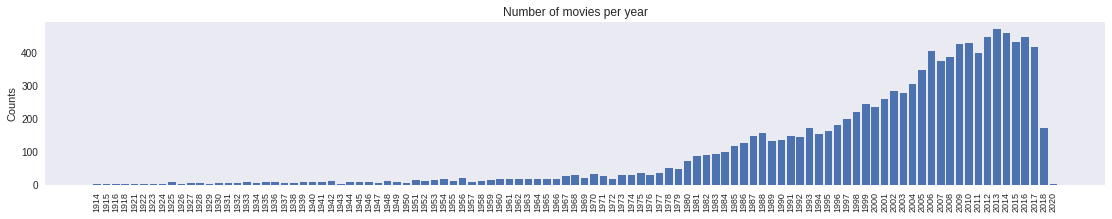

In [239]:
X = dfMovies['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMovies['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

####PRODUCTION COUNTRIES ANALYSIS

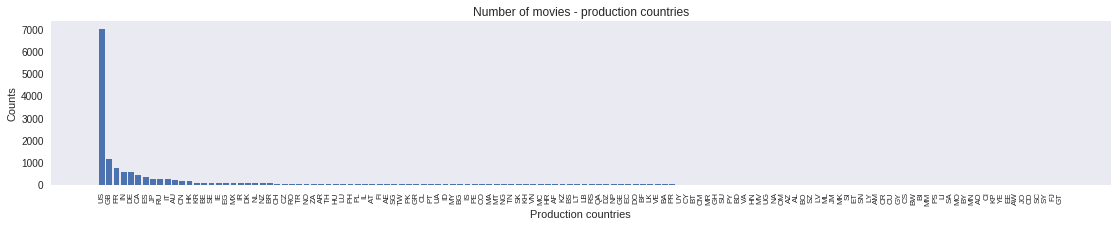

In [240]:
X = dfMoviesProductionCountries['iso_3166_1'].value_counts().index
Y = dfMoviesProductionCountries['iso_3166_1'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=8)
plt.grid(False)

plt.title('Number of movies - production countries')
plt.xlabel('Production countries')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

In [241]:
dfMoviesProductionCountries['iso_3166_1'].value_counts().head(10)

US    6997
GB    1173
FR     734
IN     568
DE     559
CA     437
ES     321
JP     256
RU     254
IT     232
Name: iso_3166_1, dtype: int64

####ORIGINAL LANGUAGE

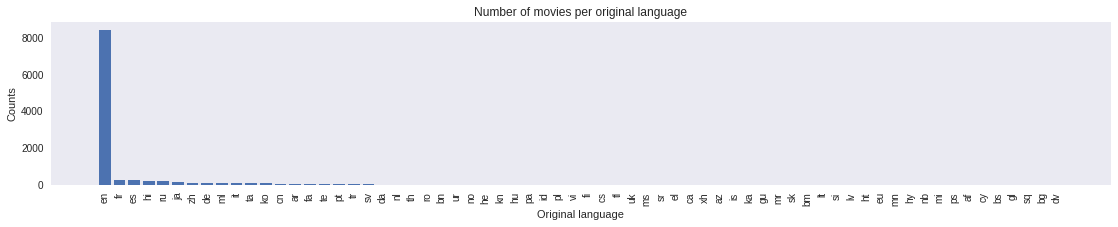

In [242]:
X = dfMovies['original_language'].value_counts().index
Y = dfMovies['original_language'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=10)
plt.grid(False)

plt.title('Number of movies per original language')
plt.xlabel('Original language')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

In [243]:
dfMovies['original_language'].value_counts().head(10)

en    8413
fr     295
es     290
hi     245
ru     239
ja     157
zh     109
de     106
ml     102
it      99
Name: original_language, dtype: int64

####RELEASE DATE

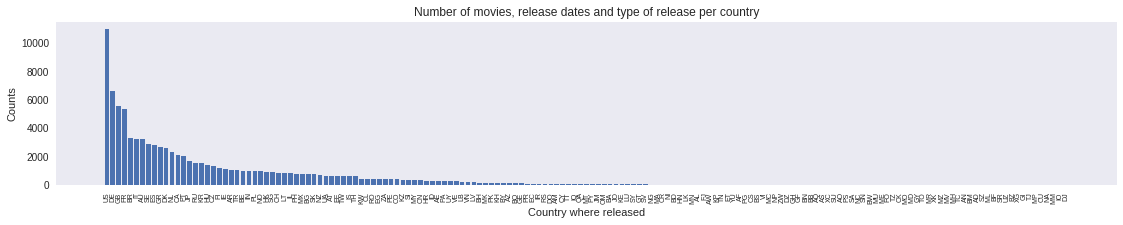

In [244]:
X = dfMoviesReleaseDates['iso_3166_1'].value_counts().index
Y = dfMoviesReleaseDates['iso_3166_1'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=7)
plt.grid(False)

plt.title('Number of movies, release dates and type of release per country')
plt.xlabel('Country where released')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

####FILTER: MOVIES RELEASED IN THE US WITH KNOWN RELEASE DATE UP TO 2017.

In [245]:
dfMoviesReleaseDates.dtypes

certification    object
iso_3166_1       object
iso_639_1        object
movie_id          int64
release_date     object
type              int64
dtype: object

In [0]:
#Voy a necesitar asegurarme de que la fecha en dfMoviesReleaseDates está en modo fecha. 
#Los posibles blancos ya se los quité. Así que lo siguiente no hace falta:
#dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].str.strip()

In [0]:
#Ya vimos que no hay ni nulos ni cadenas de longitud vacía. Así que no nos hace falta esto:
#dfMoviesReleaseDates[dfMoviesReleaseDates['release_date'].str.len()==0].shape[0]

In [248]:
#What format does this column have?
dfMoviesReleaseDates['release_date'].str.len().value_counts()

24    91749
Name: release_date, dtype: int64

In [249]:
dfMoviesReleaseDates['release_date'].head()
#Me da un poco igual que esté en GMT o en local. No va mover ficha.

0    2004-11-25T00:00:00.000Z
1    2015-02-04T00:00:00.000Z
2    2004-03-17T00:00:00.000Z
3    2004-11-04T00:00:00.000Z
4    2004-11-12T00:00:00.000Z
Name: release_date, dtype: object

In [250]:
#Let's make sure that there is no mistakes with the format: YYYY-MM-DD or YYYY-DD-MM:
#This is the month:
dfMoviesReleaseDates['release_date'].map(lambda date: date[5:7]).unique()

array(['11', '02', '03', '12', '05', '09', '01', '04', '10', '07', '06',
       '08'], dtype=object)

In [251]:
#This is the day:
dfMoviesReleaseDates['release_date'].map(lambda date: date[8:10]).unique()

array(['25', '04', '17', '12', '10', '28', '26', '19', '18', '02', '20',
       '05', '31', '27', '09', '21', '06', '15', '01', '29', '08', '23',
       '13', '03', '24', '11', '07', '16', '14', '30', '22'], dtype=object)

In [252]:
#And this is the year:
dfMoviesReleaseDates['release_date'].map(lambda date: date[0:4]).unique()

array(['2004', '2015', '2003', '1993', '1994', '2002', '2014', '2000',
       '1980', '1981', '2013', '2012', '1989', '2018', '2017', '1988',
       '2009', '2006', '2005', '2008', '2007', '1969', '1970', '1971',
       '2016', '1998', '1997', '1996', '2011', '2001', '1978', '1972',
       '1982', '2010', '1990', '1986', '1987', '1942', '1995', '1992',
       '1985', '1967', '1983', '1999', '1976', '1952', '1950', '1949',
       '1991', '1938', '1940', '1965', '1984', '1960', '1962', '1961',
       '1964', '1968', '1951', '1979', '1959', '1953', '1944', '1977',
       '1936', '1973', '1974', '1958', '1957', '1956', '1975', '1966',
       '1948', '1963', '1937', '1954', '1926', '1935', '1943', '1939',
       '1933', '1927', '1928', '1947', '1946', '1955', '1925', '1941',
       '1945', '1916', '1922', '2020', '1934', '1930', '2019', '1924',
       '1918', '1921', '1915', '1920', '1932', '1931', '1929', '1923',
       '1914'], dtype=object)

In [0]:
#So we can convert release_date into datetime format:
dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].map(lambda str: str[0:10]).map(pd.to_datetime)

In [254]:
dfMoviesReleaseDates.dtypes

certification            object
iso_3166_1               object
iso_639_1                object
movie_id                  int64
release_date     datetime64[ns]
type                      int64
dtype: object

In [0]:
#FILTER: MOVIES RELEASED IN THE US WITH KNOWN RELEASE DATE UP TO 2017-12-31.
dfMoviesIdsUS = pd.DataFrame(dfMoviesReleaseDates[(dfMoviesReleaseDates['release_date']<='2017-12-31') & (dfMoviesReleaseDates['iso_3166_1']=='US')]['movie_id'].unique(), columns=['movie_id'])

In [385]:
dfMoviesIdsUS.shape

(8804, 1)

In [0]:
#Se pierde alguna fila porque en dfMovies habíamos filtrado las status="Released"
dfMoviesUS = dfMovies.merge(dfMoviesIdsUS, how='inner')

In [387]:
dfMoviesUS.shape

(8790, 28)

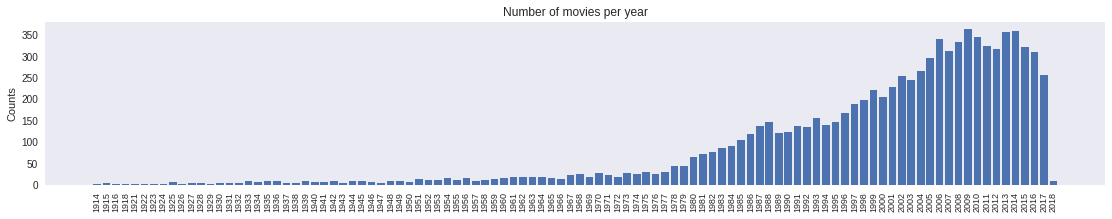

In [259]:
X = dfMoviesUS['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

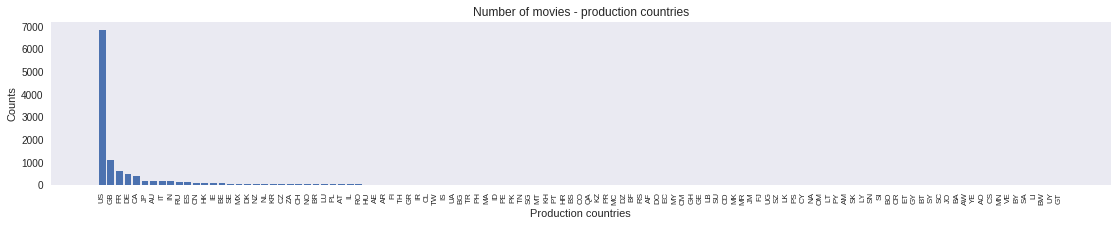

In [260]:
X = dfMoviesProductionCountries.merge(dfMoviesIdsUS, how='inner')['iso_3166_1'].value_counts().index
Y = dfMoviesProductionCountries.merge(dfMoviesIdsUS, how='inner')['iso_3166_1'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=8)
plt.grid(False)

plt.title('Number of movies - production countries')
plt.xlabel('Production countries')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

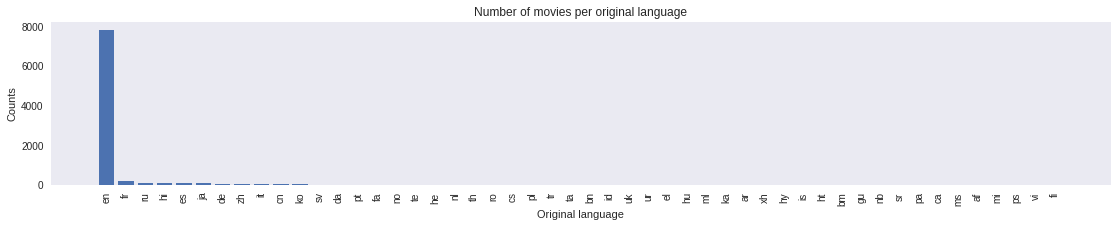

In [261]:
X = dfMoviesUS['original_language'].value_counts().index
Y = dfMoviesUS['original_language'].value_counts().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=10)
plt.grid(False)

plt.title('Number of movies per original language')
plt.xlabel('Original language')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

In [262]:
dfMoviesUS['original_language'].value_counts()

en    7832
fr     196
ru     113
hi      98
es      86
ja      83
de      57
zh      51
it      46
cn      43
ko      34
sv      20
da      16
pt      11
fa       9
no       8
te       7
he       7
nl       6
th       5
ro       5
cs       5
pl       5
tr       4
ta       4
bn       3
id       3
uk       3
ur       3
el       3
hu       2
ml       2
ka       2
ar       2
xh       1
hy       1
is       1
ht       1
bm       1
gu       1
nb       1
sr       1
pa       1
ca       1
ms       1
af       1
mi       1
ps       1
vi       1
fi       1
Name: original_language, dtype: int64

####REVENUE ANALYSIS

In [388]:
dfMoviesUS['revenue_final'].sort_values(ascending=False).head(10)

4981    2.787965e+09
4459    2.068224e+09
3814    1.845034e+09
6369    1.671713e+09
4873    1.519558e+09
8681    1.506249e+09
1151    1.405404e+09
1285    1.342000e+09
7779    1.332460e+09
1188    1.274219e+09
Name: revenue_final, dtype: float64

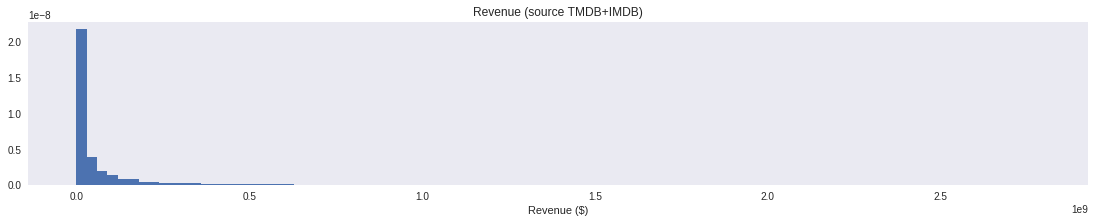

In [264]:
figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(dfMoviesUS.shape[0]))
plt.hist(dfMoviesUS['revenue_final'], bins=num_bins)

plt.grid(False)
plt.xlabel('Revenue ($)')
plt.title('Revenue (source TMDB+IMDB)')
figure.set_size_inches([19,3])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


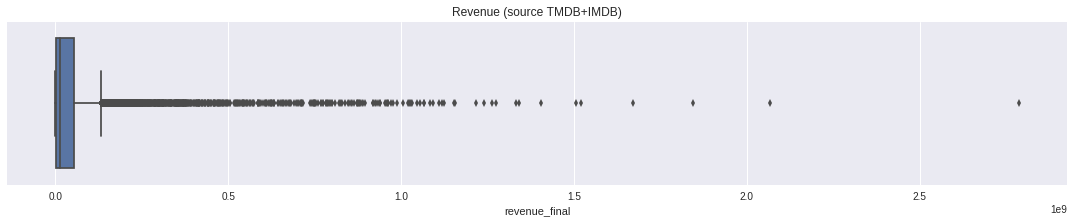

In [265]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['revenue_final'])

figure.set_size_inches([19,3])
plt.title('Revenue (source TMDB+IMDB)')
plt.show()

In [266]:
dfMoviesUS[['revenue', 'imdb_revenue','revenue_final']].describe()

,revenue,imdb_revenue,revenue_final
count,7.973000e+03,4.010000e+03,8.790000e+03
mean,6.546499e+07,4.806592e+07,6.055134e+07
std,1.446889e+08,6.738378e+07,1.388242e+08
min,1.000000e+00,1.620000e+02,1.000000e+00
25%,1.562546e+06,5.488766e+06,1.300000e+06
50%,1.411001e+07,2.544575e+07,1.234577e+07
75%,6.103784e+07,6.220937e+07,5.320411e+07
max,2.787965e+09,7.605058e+08,2.787965e+09


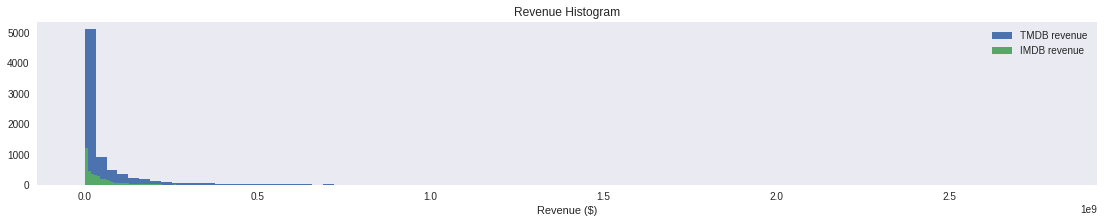

In [267]:
figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(dfMoviesUS['revenue'].notnull().sum()))
plt.hist(dfMoviesUS['revenue'][dfMoviesUS['revenue'].notnull()], bins=num_bins, label='TMDB revenue')
plt.hist(dfMoviesUS['imdb_revenue'][dfMoviesUS['imdb_revenue'].notnull()], bins=num_bins, label='IMDB revenue')

plt.grid(False)
plt.xlabel('Revenue ($)')
plt.title('Revenue Histogram')
plt.legend(loc='best')
figure.set_size_inches([19,3])

plt.show()

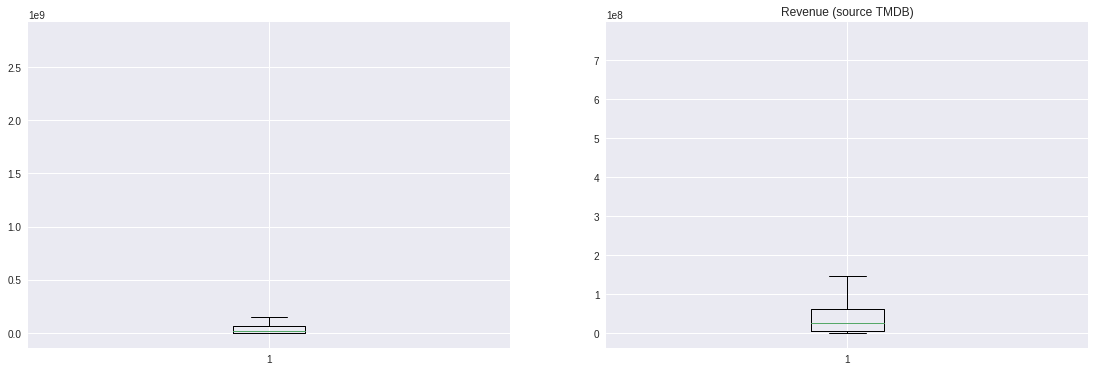

In [268]:
#Pendiente mejorar!!!!
figure, axes = plt.subplots(1,2)

axes[0].boxplot(dfMoviesUS[dfMoviesUS['revenue'].notnull()]['revenue'])
plt.title('Revenue (source TMDB)')
axes[1].boxplot(dfMoviesUS[dfMoviesUS['imdb_revenue'].notnull()]['imdb_revenue'])

figure.set_size_inches([19,6])
plt.title('Revenue (source TMDB)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


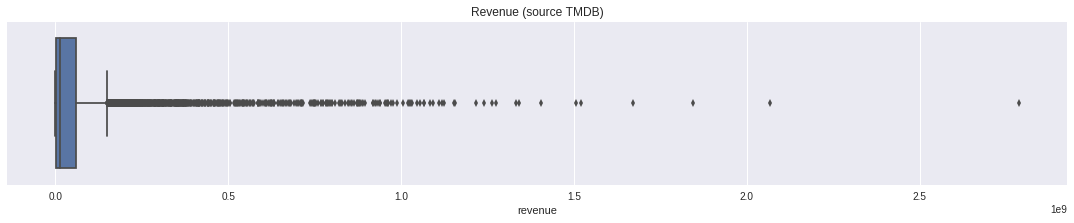

In [269]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['revenue'])

figure.set_size_inches([19,3])
plt.title('Revenue (source TMDB)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


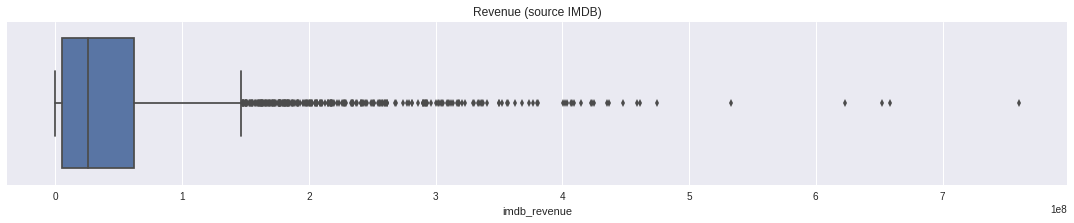

In [270]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['imdb_revenue'])

figure.set_size_inches([19,3])
plt.title('Revenue (source IMDB)')
plt.show()

In [271]:
dfMoviesUS[['revenue', 'imdb_revenue','revenue_final']].describe()

,revenue,imdb_revenue,revenue_final
count,7.973000e+03,4.010000e+03,8.790000e+03
mean,6.546499e+07,4.806592e+07,6.055134e+07
std,1.446889e+08,6.738378e+07,1.388242e+08
min,1.000000e+00,1.620000e+02,1.000000e+00
25%,1.562546e+06,5.488766e+06,1.300000e+06
50%,1.411001e+07,2.544575e+07,1.234577e+07
75%,6.103784e+07,6.220937e+07,5.320411e+07
max,2.787965e+09,7.605058e+08,2.787965e+09


In [272]:
dfMoviesUS['revenue'].value_counts().sort_index().head(10)

1.0     27
2.0      8
3.0      5
4.0      4
5.0      9
6.0      7
7.0      6
8.0      9
9.0      4
10.0    10
Name: revenue, dtype: int64

In [273]:
dfMoviesUS['imdb_revenue'].value_counts().sort_index().head(10)

162.0     1
703.0     1
721.0     1
728.0     1
828.0     1
1111.0    1
1332.0    1
1521.0    1
1711.0    1
2436.0    1
Name: imdb_revenue, dtype: int64

In [0]:
limit = 10000

In [275]:
dfMoviesUS[dfMoviesUS['revenue']<=limit].shape[0]

434

In [276]:
#Y de los anteriores, cuántos tienen dato en IMDB?
dfMoviesUS[(dfMoviesUS['revenue']<=limit) & (dfMoviesUS['imdb_revenue'].notnull())].shape[0]

29

In [277]:
#Veamoslos:
dfMoviesUS[(dfMoviesUS['revenue']<=limit) & (dfMoviesUS['imdb_revenue'].notnull())][['revenue', 'imdb_revenue', 'revenue_final']].sort_values(by='revenue')

,revenue,imdb_revenue,revenue_final
2574,5.0,5430822.0,5430822.0
2792,5.0,4771000.0,4771000.0
1382,7.0,7680.0,7680.0
2024,8.0,8596914.0,8596914.0
4082,8.0,8579684.0,8579684.0
776,10.0,10149779.0,10149779.0
7813,11.0,11835.0,11835.0
925,12.0,11540112.0,11540112.0
4213,12.0,12189514.0,12189514.0
8492,13.0,13038660.0,13038660.0


De las 283 películas en TMDB con ingreso menor que 500dólares, viendo el dato equivalente de IMDB cuando está disponible, veo que ningún dato es correcto. Por encima de 1500 ya parece que sí. 
En IMDB, la única peli con ingreso menor que 500 también parece un error.
Así que: voy a convertir a nulos todos los valores de ingresos que sean menores que 500. 
Esto puede afectar a mis datos de pelis antiguas, pero puede hacer más daño en mi modelo de pelis más actuales. Tendré que centrarme en las pelis más actuales. 
Una vez hecho esto, el dato de IMDB lo tomaré cuando tenga nulo en TMDB, siembre y cuando la fecha sea anterior al 1/ene/2016.

In [278]:
limit = 500
dfMoviesUS[dfMoviesUS['revenue']<=limit].shape[0]

283

In [279]:
dfMoviesUS[dfMoviesUS['imdb_revenue']<=limit].shape[0]

1

In [280]:
#¿cúal es? Parece que es un error también.
dfMoviesUS[dfMoviesUS['imdb_revenue']<=limit].iloc[0]

belongs_to_collection_id                                                    NaN
belongs_to_collection_name                                                 None
budget                                                                    1e+07
imdb_id                                                               tt1641841
movie_id                                                                 327833
original_language                                                            en
original_title                                                       Skin Trade
overview                      After his family is killed by a Serbian gangst...
popularity                                                                5.164
release_date                                                2014-11-07 00:00:00
revenue                                                                     NaN
reviews_page                                                                  1
reviews_total_pages                     

In [281]:
dfMoviesUS[dfMoviesUS['revenue']<=limit].shape[0]/dfMoviesUS['revenue'].notnull().sum()

0.03549479493289853

In [282]:
dfMoviesUS[dfMoviesUS['imdb_revenue']<=limit].shape[0]/dfMoviesUS['imdb_revenue'].notnull().sum()

0.00024937655860349125

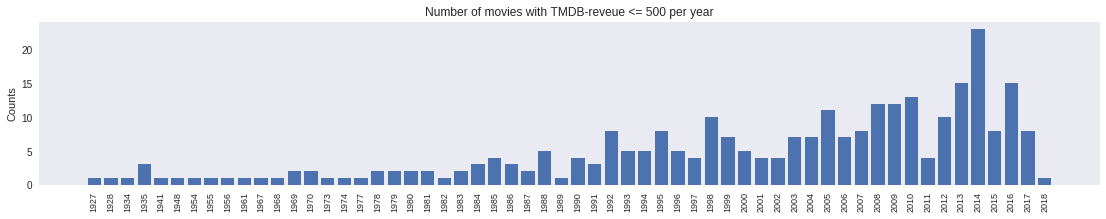

In [283]:
X = dfMoviesUS[dfMoviesUS['revenue']<=limit]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS[dfMoviesUS['revenue']<=limit]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies with TMDB-reveue <= %s per year'%limit)
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

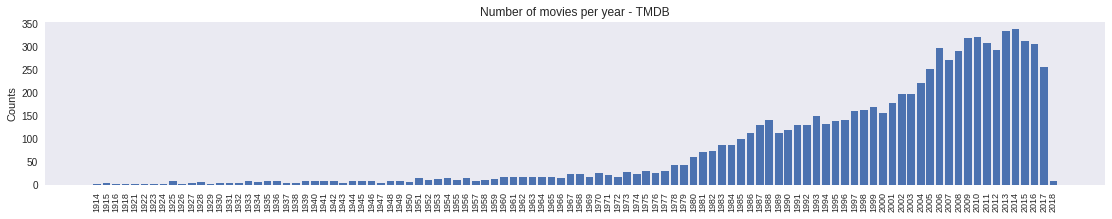

In [284]:
X = dfMoviesUS[dfMoviesUS['revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS[dfMoviesUS['revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year - TMDB')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

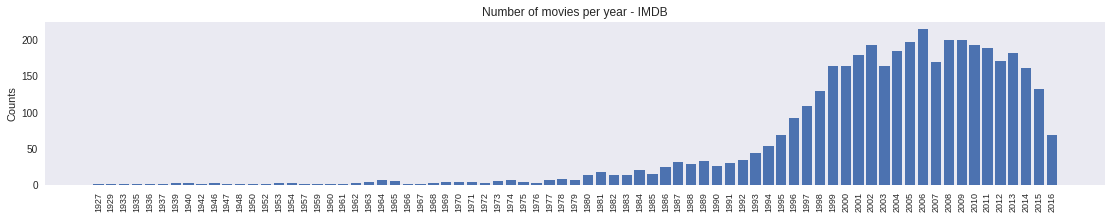

In [285]:
#La tabla de IMDB que he usado se publicó en sep-2016. Así que no tomaré los datos posteriores al 31/12/2015.
X = dfMoviesUS[dfMoviesUS['imdb_revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS[dfMoviesUS['imdb_revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year - IMDB')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

In [0]:
#¿Cuántas pelis tengo en ambas fuentes anteriores a 1970? ¿Qué peso suponen?
dateLimit = '1950-01-01'

In [287]:
dfMoviesUS[(dfMoviesUS['revenue'].notnull()) & (dfMoviesUS['release_date']<dateLimit)].shape[0]

161

In [288]:
dfMoviesUS[(dfMoviesUS['imdb_revenue'].notnull()) & (dfMoviesUS['release_date']<dateLimit)].shape[0]

15

In [289]:
dfMoviesUS[(dfMoviesUS['revenue'].notnull()) & (dfMoviesUS['release_date']<dateLimit)].shape[0]/dfMoviesUS['revenue'].notnull().sum()

0.02019315188762072

In [290]:
dfMoviesUS[(dfMoviesUS['imdb_revenue'].notnull()) & (dfMoviesUS['release_date']<dateLimit)].shape[0]/dfMoviesUS['imdb_revenue'].notnull().sum()

0.003740648379052369

In [0]:
#1: Anulo los ingresos cuando el dato es menor que 500$:   QUIZÁ ES UNA MALA PRÁCTICA, PORQUE PIERDO LA VISIBILIDAD DEL DATO INICIAL
dfMoviesUS.loc[dfMoviesUS['revenue']<=500, 'revenue'] = None
dfMoviesUS.loc[dfMoviesUS['imdb_revenue']<=500, 'imdb_revenue'] = None

In [0]:
#2: Tomo el dato de TMDB, a no ser que sea nulo, en cuyo caso tomo el de IMDB.
dfMoviesUS['revenue_final'] = dfMoviesUS['revenue'].combine_first(dfMoviesUS['imdb_revenue'])

In [0]:
#3: Pero desde el 1/ene/2016 tomo siempre el de TMDB.
dfMoviesUS.loc[dfMoviesUS['release_date']>='2016-01-01','revenue_final'] = dfMoviesUS.loc[dfMoviesUS['release_date']>='2016-01-01','revenue']

In [393]:
#A ver si lo he hecho bien:
#No hay ingresos menores o iguales que 500
dfMoviesUS[dfMoviesUS['revenue_final']<=500].shape[0]

0

In [394]:
#En el 2016, excluyendo los ingresos <=500, el revenue final coincide con el de TMDB:
dfMoviesUS[(dfMoviesUS['release_date']>='2016-01-01') & (dfMoviesUS['revenue']>500)][['revenue','revenue_final']].describe()

,revenue,revenue_final
count,5.440000e+02,5.440000e+02
mean,1.043201e+08,1.043201e+08
std,2.110739e+08,2.110739e+08
min,6.000000e+02,6.000000e+02
25%,1.195026e+06,1.195026e+06
50%,1.388977e+07,1.388977e+07
75%,1.023921e+08,1.023921e+08
max,1.332460e+09,1.332460e+09


In [395]:
#Que coincide a su vez con el revenue final en 2016 para todos los casos:
dfMoviesUS[dfMoviesUS['release_date']>='2016-01-01']['revenue_final'].describe()

count    5.440000e+02
mean     1.043201e+08
std      2.110739e+08
min      6.000000e+02
25%      1.195026e+06
50%      1.388977e+07
75%      1.023921e+08
max      1.332460e+09
Name: revenue_final, dtype: float64

In [396]:
#Busco los casos donde se ha tomado el dato de IMDB (me salen 837 filas):   
dfMoviesUS[(dfMoviesUS['release_date']<'2016-01-01') & (dfMoviesUS['imdb_revenue']>500) & (dfMoviesUS['revenue'].isnull())][['revenue','imdb_revenue', 'revenue_final']]

,revenue,imdb_revenue,revenue_final
19,NaN,326308.0,326308.0
30,NaN,27445.0,27445.0
75,NaN,100503.0,100503.0
95,NaN,4091.0,4091.0
104,NaN,17804273.0,17804273.0
126,NaN,1508689.0,1508689.0
127,NaN,23031390.0,23031390.0
151,NaN,69586544.0,69586544.0
158,NaN,505295.0,505295.0
161,NaN,47095453.0,47095453.0


In [399]:
#Miro uno de los ejemplos anteriores:
dfMoviesUS[dfMoviesUS.index==4213][['revenue', 'imdb_revenue', 'revenue_final']]

,revenue,imdb_revenue,revenue_final
4213,NaN,12189514.0,12189514.0


In [400]:
#A ver cómo queda la foto:
#Resumen total: el count de revenue_final crece 837 vs el de TMDB
dfMoviesUS[['revenue', 'imdb_revenue','revenue_final']].describe()

,revenue,imdb_revenue,revenue_final
count,7.690000e+03,4.009000e+03,8.527000e+03
mean,6.787417e+07,4.807791e+07,6.245334e+07
std,1.467714e+08,6.738791e+07,1.405275e+08
min,5.010000e+02,7.030000e+02,5.010000e+02
25%,2.148434e+06,5.501940e+06,1.738754e+06
50%,1.560427e+07,2.545053e+07,1.364000e+07
75%,6.472874e+07,6.230000e+07,5.639133e+07
max,2.787965e+09,7.605058e+08,2.787965e+09


In [402]:
#4: Y ahora elimino de dfMoviesUS los que tienen revenue_final nulo:
dfMoviesUS['revenue_final'].isnull().sum()

263

In [0]:
dfMoviesUS = dfMoviesUS[dfMoviesUS['revenue_final'].notnull()]

In [404]:
dfMoviesUS.shape

(8527, 28)

In [405]:
#A ver cómo queda la foto:
dfMoviesUS['revenue_final'].describe()

count    8.527000e+03
mean     6.245334e+07
std      1.405275e+08
min      5.010000e+02
25%      1.738754e+06
50%      1.364000e+07
75%      5.639133e+07
max      2.787965e+09
Name: revenue_final, dtype: float64

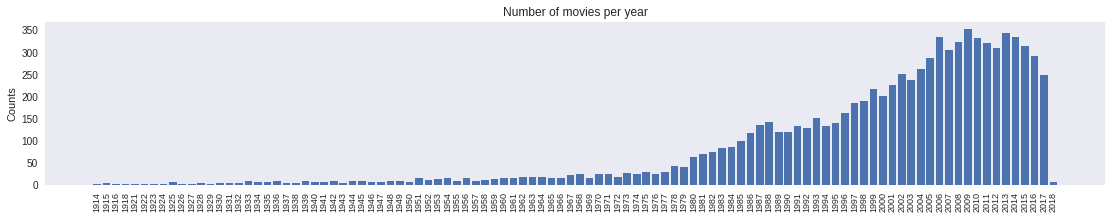

In [406]:
X = dfMoviesUS['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

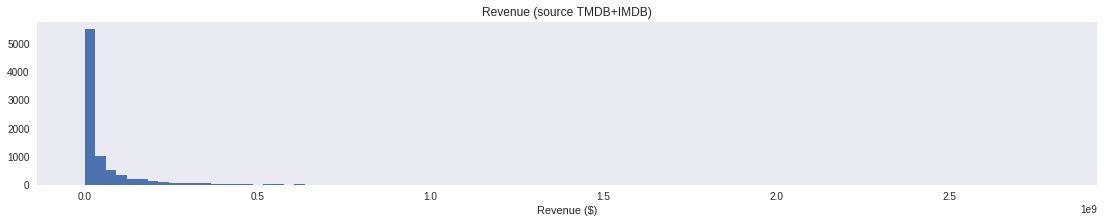

In [407]:
figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(dfMoviesUS.shape[0]))
plt.hist(dfMoviesUS['revenue_final'], bins=num_bins)

plt.grid(False)
plt.xlabel('Revenue ($)')
plt.title('Revenue (source TMDB+IMDB)')
figure.set_size_inches([19,3])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


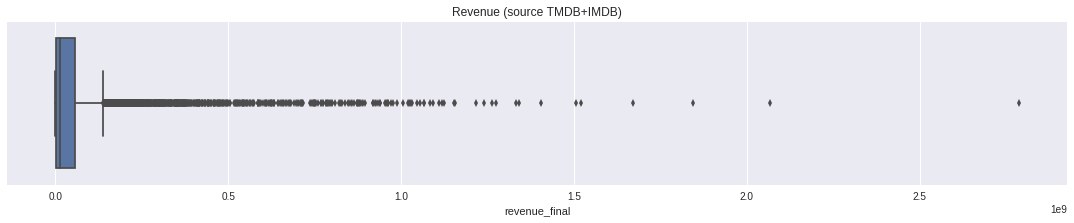

In [408]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['revenue_final'])

figure.set_size_inches([19,3])
plt.title('Revenue (source TMDB+IMDB)')
plt.show()

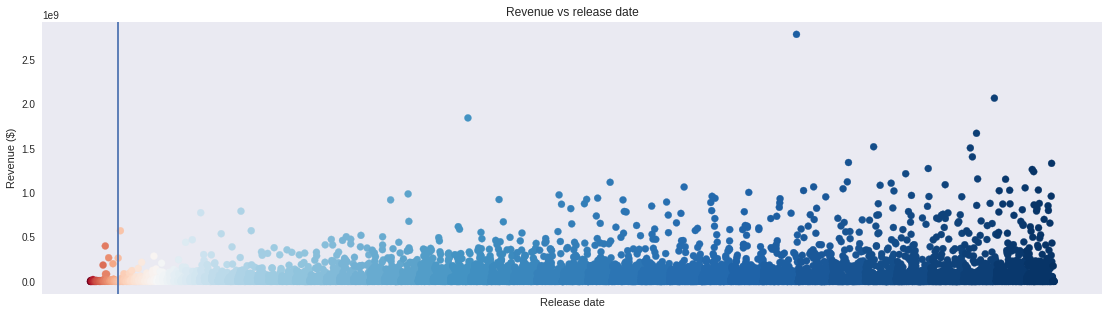

In [409]:
X = dfMoviesUS.sort_values(by='release_date')['release_date'].map(str)
Y = dfMoviesUS.sort_values(by='release_date')['revenue_final']

Years = dfMoviesUS.sort_values(by='release_date')['release_date'].map(lambda datetime: datetime.year)

figure, axes = plt.subplots(1,1)

plt.scatter(X, Y, cmap='RdBu', c=Years)
plt.axvline(x='1950-03-04 00:00:00')
plt.xticks([])
plt.grid(False)

plt.xlabel('Release date')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs release date')

figure.set_size_inches([19,5])

plt.show()

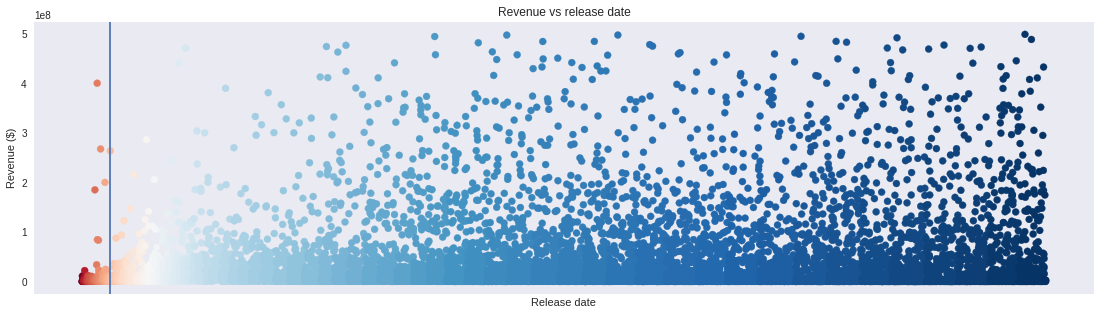

In [410]:
X = dfMoviesUS[dfMoviesUS['revenue_final']<500000000].sort_values(by='release_date')['release_date'].map(str)
Y = dfMoviesUS[dfMoviesUS['revenue_final']<500000000].sort_values(by='release_date')['revenue_final']

Years = dfMoviesUS[dfMoviesUS['revenue_final']<500000000].sort_values(by='release_date')['release_date'].map(lambda datetime: datetime.year)

figure, axes = plt.subplots(1,1)

plt.scatter(X, Y, cmap='RdBu', c=Years)
plt.axvline(x='1950-03-04 00:00:00')

plt.xticks([])
plt.grid(False)

plt.xlabel('Release date')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs release date')

figure.set_size_inches([19,5])

plt.show()

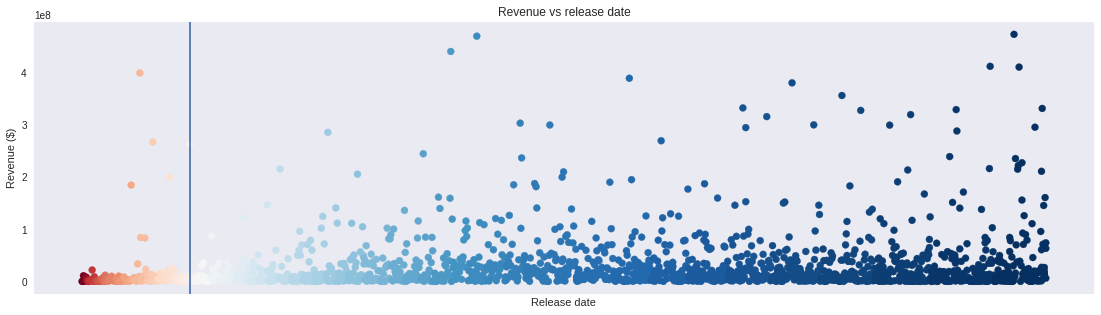

In [411]:
X = dfMoviesUS[(dfMoviesUS['revenue_final']<500000000) & (dfMoviesUS['release_date']<'1990-01-01')].sort_values(by='release_date')['release_date'].map(str)
Y = dfMoviesUS[(dfMoviesUS['revenue_final']<500000000) & (dfMoviesUS['release_date']<'1990-01-01')].sort_values(by='release_date')['revenue_final']

Years = dfMoviesUS[(dfMoviesUS['revenue_final']<500000000) & (dfMoviesUS['release_date']<'1990-01-01')].sort_values(by='release_date')['release_date'].map(lambda datetime: datetime.year)

figure, axes = plt.subplots(1,1)

plt.scatter(X, Y, cmap='RdBu', c=Years)
plt.axvline(x='1950-03-04 00:00:00')

plt.xticks([])
plt.grid(False)

plt.xlabel('Release date')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs release date')

figure.set_size_inches([19,5])

plt.show()

In [412]:
dfMoviesUS[(dfMoviesUS['revenue_final']<500000000) & (dfMoviesUS['release_date']>='1950-01-01')].sort_values(by='release_date')['release_date'].map(str).head()

4511    1950-03-04 00:00:00
789     1950-03-31 00:00:00
5536    1950-05-17 00:00:00
3257    1950-08-10 00:00:00
8081    1950-11-09 00:00:00
Name: release_date, dtype: object

In [413]:
#De momento voy a exlucir el periodo anterior a 1950 (pendiente añadir después todo el periodo con inflación). Así que voy a excluir:
dfMoviesUS[dfMoviesUS['release_date']<'1950-01-01'].shape[0]

154

In [414]:
dfMoviesUS.shape[0]

8527

In [415]:
#ACTUALIZACIÓN DE LA BASE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dfMoviesUS = dfMoviesUS[dfMoviesUS['release_date']>'1949-12-31']
dfMoviesUS.shape[0]

8373

####BUDGET

In [416]:
dfMoviesUS[['budget', 'imdb_budget', 'budget_final']].describe()

,budget,imdb_budget,budget_final
count,5.791000e+03,3.921000e+03,6.249000e+03
mean,3.075224e+07,4.296269e+07,3.047979e+07
std,3.981566e+07,2.178613e+08,6.662064e+07
min,1.000000e+00,2.180000e+02,1.000000e+00
25%,6.000000e+06,9.000000e+06,5.200000e+06
50%,1.700000e+07,2.200000e+07,1.505000e+07
75%,4.000000e+07,5.000000e+07,3.700000e+07
max,5.000000e+08,1.221550e+10,4.200000e+09


In [0]:
limit = 10000

In [371]:
dfMoviesUS[dfMoviesUS['budget']<=limit].shape[0]

56

In [372]:
dfMoviesUS[(dfMoviesUS['budget']<=limit) & (dfMoviesUS['imdb_budget'].notnull())].shape[0]

9

In [373]:
#A partir de 200€ ya tengo pelis en las que las dos fuentes coinciden.
dfMoviesUS[(dfMoviesUS['budget']<=limit) & (dfMoviesUS['imdb_budget'].notnull())][['budget', 'imdb_budget', 'budget_final']].sort_values(by='budget')

,budget,imdb_budget,budget_final
6896,1.0,1400000.0,1400000.0
7588,1.0,1000000.0,1000000.0
4876,10.0,10000000.0,10000000.0
2472,15.0,15000000.0,15000000.0
3755,218.0,218.0,218.0
3619,7000.0,7000.0,7000.0
553,8000.0,120000.0,8000.0
8276,9000.0,9000.0,9000.0
4600,10000.0,20000.0,10000.0


In [417]:
#Independientemente de que imdb tenga dato, ¿cuántas pelis tengo con budget de menos de 200€?
dfMoviesUS[dfMoviesUS['budget']<=200][['budget', 'imdb_budget', 'budget_final', 'release_date', 'original_title']].sort_values(by='budget')

,budget,imdb_budget,budget_final,release_date,original_title
7588,1.0,1000000.0,1000000.0,1998-10-07,Slam
6896,1.0,1400000.0,1400000.0,2004-12-17,Incident at Loch Ness
4462,1.0,NaN,1.0,2011-06-03,"Love, Wedding, Marriage"
3340,1.0,NaN,1.0,2017-03-31,Bellator 175: Rampage vs. King Mo 2
120,4.0,NaN,4.0,2000-10-03,Whispers: An Elephant Tale
2024,6.0,6000000.0,6000000.0,2000-09-06,Pollock
2574,7.0,7000000.0,7000000.0,1992-05-01,Split Second
3936,7.0,7000.0,7000.0,2005-03-12,Cavite
8583,8.0,8000000.0,8000000.0,1995-09-01,The Prophecy
4082,9.0,9000000.0,9000000.0,2007-02-09,Death at a Funeral


Decisión: 

In [419]:
#En IMDB, no hay ninguna peli con budget <100. Siendo conservador (seguro que dejo errores), voy a anular todos los valores <100.
dfMoviesUS[dfMoviesUS['imdb_budget']<100].shape[0]

0

In [0]:
#1: Anulo el budget cuando el dato es menor que 100$:   QUIZÁ ES UNA MALA PRÁCTICA, PORQUE PIERDO LA VISIBILIDAD DEL DATO INICIAL.
#Aunque siempre tengo dfMovies.
dfMoviesUS.loc[dfMoviesUS['budget']<100, 'budget'] = None
dfMoviesUS.loc[dfMoviesUS['imdb_budget']<100, 'imdb_budget'] = None  #Aunque no tiene efectos (porque no hay ninguno), lo hago, por si cambio la base.

In [0]:
#2: Tomo el dato de TMDB, a no ser que sea nulo, en cuyo caso tomo el de IMDB.
#Y no aplico ninguna restricción al año 2016 (entiendo que el budget, a diferencia del revenue, está bien recogido para IMDB.)
dfMoviesUS['budget_final'] = dfMoviesUS['budget'].combine_first(dfMoviesUS['imdb_budget'])

In [422]:
dfMoviesUS[['budget', 'imdb_budget', 'budget_final']].describe()

,budget,imdb_budget,budget_final
count,5.769000e+03,3.921000e+03,6.245000e+03
mean,3.086952e+07,4.296269e+07,3.049931e+07
std,3.984611e+07,2.178613e+08,6.663750e+07
min,1.000000e+02,2.180000e+02,1.000000e+02
25%,6.000000e+06,9.000000e+06,5.300000e+06
50%,1.700000e+07,2.200000e+07,1.530000e+07
75%,4.000000e+07,5.000000e+07,3.700000e+07
max,5.000000e+08,1.221550e+10,4.200000e+09


In [424]:
#Veo ejemplos para confirmar que lo he hecho bien:
dfMoviesUS[(dfMoviesUS.index==120) | (dfMoviesUS.index==4876) | (dfMoviesUS.index==5953)][['budget', 'imdb_budget', 'budget_final']]

,budget,imdb_budget,budget_final
120,NaN,NaN,NaN
4876,NaN,10000000.0,10000000.0
5953,150.0,NaN,150.0
